In [3]:
import os
from utils import data_loader_utils
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsfresh import extract_features
from tsfresh import select_features
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, roc_auc_score
from tsfresh import select_features, extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction.feature_calculators import (skewness, kurtosis, minimum, maximum, standard_deviation, approximate_entropy)
from tsfresh.feature_extraction import MinimalFCParameters


In [3]:
machines = ["M01","M02","M03"]
process_names = ["OP00","OP01","OP02","OP03","OP04","OP05","OP06","OP07","OP08","OP09","OP10","OP11","OP12","OP13","OP14"]
labels = ["good","bad"]
path_to_dataset = "./data/"

In [4]:
X_data = []
y_data = []
for process_name in process_names:
    for machine in machines:
        for label in labels:
            data_path = os.path.join(path_to_dataset, machine, process_name, label)
            data_list, data_label = data_loader_utils.load_tool_research_data(data_path, add_additional_label=False, label=label)
            #concatenating
            X_data.extend(data_list)
            y_data.extend(data_label)

laoding files from ./data/M01/OP00/good... 
laoding files from ./data/M01/OP00/bad... 
laoding files from ./data/M02/OP00/good... 
laoding files from ./data/M02/OP00/bad... 
laoding files from ./data/M03/OP00/good... 
laoding files from ./data/M03/OP00/bad... 
laoding files from ./data/M01/OP01/good... 
laoding files from ./data/M01/OP01/bad... 
laoding files from ./data/M02/OP01/good... 
laoding files from ./data/M02/OP01/bad... 
laoding files from ./data/M03/OP01/good... 
laoding files from ./data/M03/OP01/bad... 
laoding files from ./data/M01/OP02/good... 
laoding files from ./data/M01/OP02/bad... 
laoding files from ./data/M02/OP02/good... 
laoding files from ./data/M02/OP02/bad... 
laoding files from ./data/M03/OP02/good... 
laoding files from ./data/M03/OP02/bad... 
laoding files from ./data/M01/OP03/good... 
laoding files from ./data/M01/OP03/bad... 
laoding files from ./data/M02/OP03/good... 
laoding files from ./data/M02/OP03/bad... 
laoding files from ./data/M03/OP03/good... 

In [5]:
data_label

[]

In [6]:
good_X_data = []
good_y_data = []
bad_X_data = []
bad_y_data = []

for i, label in enumerate(y_data):
    if label == "good":
        good_X_data.append(X_data[i])
        good_y_data.append(label)
    elif label == "bad":
        bad_X_data.append(X_data[i])
        bad_y_data.append(label)
    else:
        # Handle other labels if necessary
        pass


In [7]:
len(bad_X_data)

70

In [8]:

# Load the HDF5 file
data_file = './data/M01/OP01/good/M01_Feb_2019_OP01_000.h5'  # Replace with the actual file path

with h5py.File(data_file, 'r') as file:
    # Extract the vibration data
    vibration_data = file['vibration_data'][:]

# Create a Pandas DataFrame with separate columns for X, Y, and Z
vibration_df = pd.DataFrame({'X': vibration_data[:, 0], 'Y': vibration_data[:, 1], 'Z': vibration_data[:, 2]})
time = len(vibration_df)/2000
# Display the first few rows of the DataFrame
print(vibration_df, time)

          X     Y       Z
0       9.0  27.0 -1036.0
1       9.0  17.0 -1040.0
2       5.0  23.0 -1036.0
3       5.0  29.0 -1038.0
4      11.0  27.0 -1028.0
...     ...   ...     ...
58795  23.0  17.0 -1048.0
58796  11.0  50.0 -1046.0
58797  19.0  23.0 -1042.0
58798  31.0  42.0 -1042.0
58799  17.0  35.0 -1050.0

[58800 rows x 3 columns] 29.4


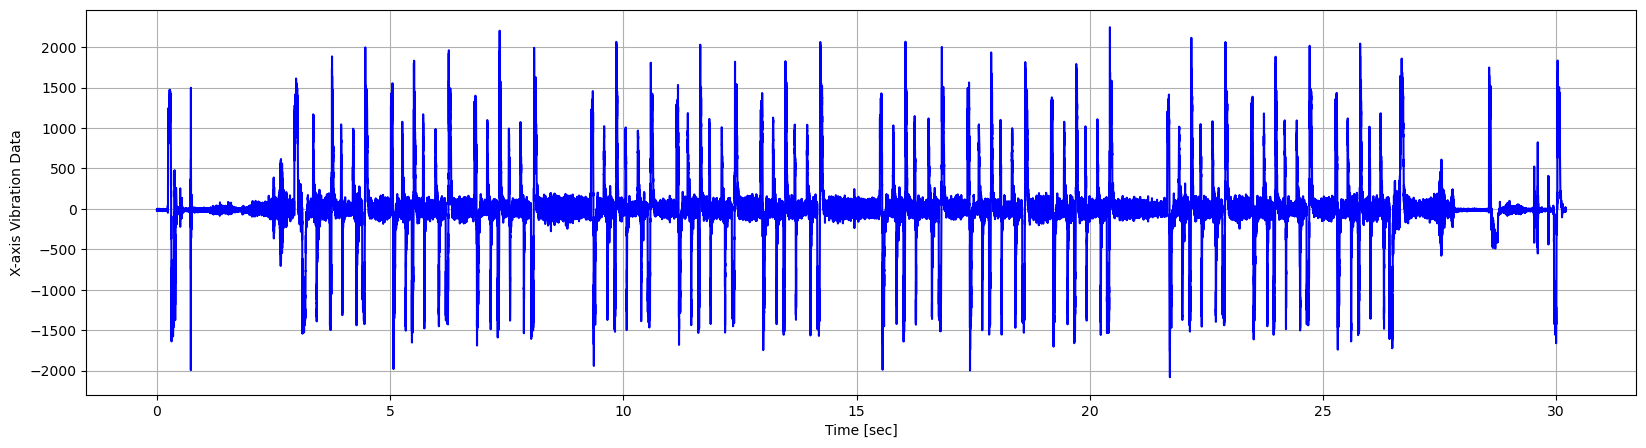

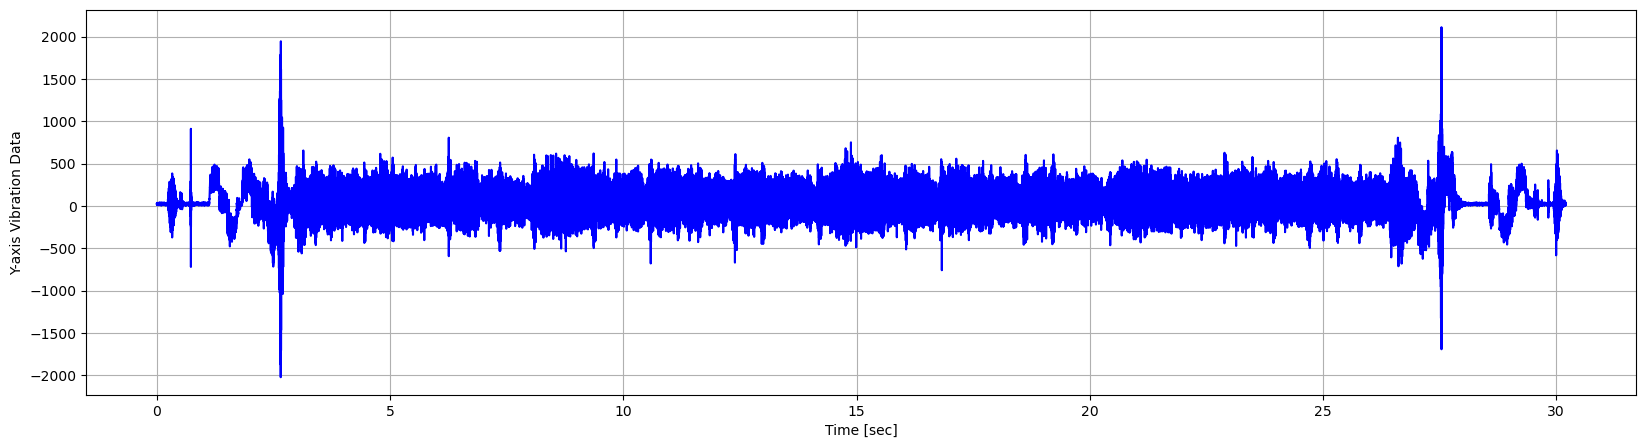

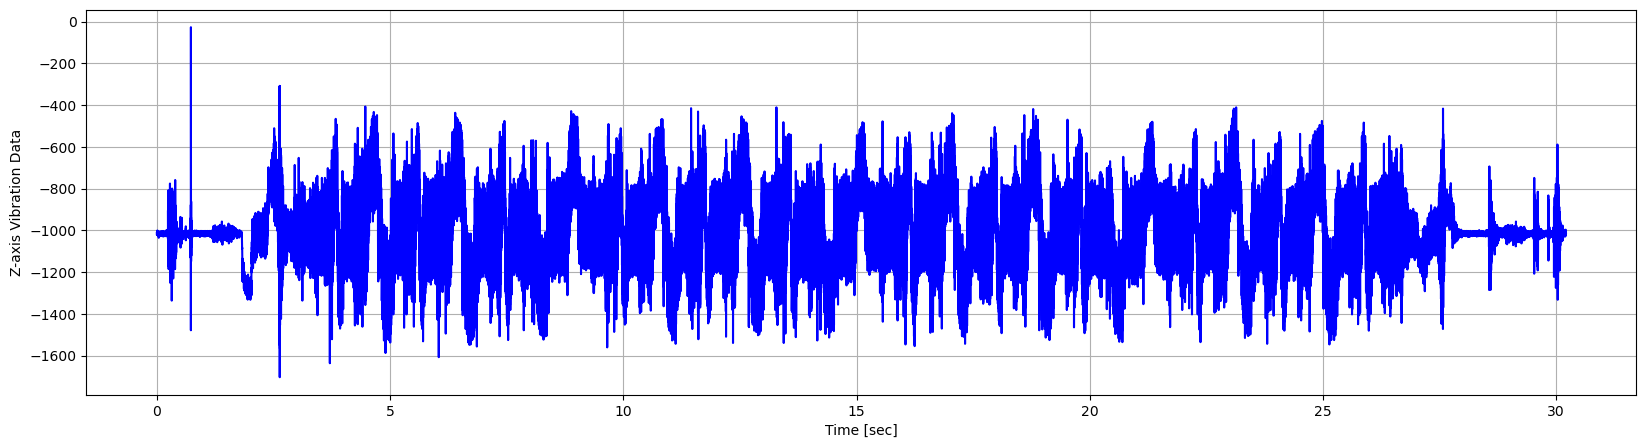

In [9]:


file="./data/M01/OP01/good/M01_Aug_2019_OP01_000.h5"
sample = data_loader_utils.datafile_read(file)

In [10]:
! python --version

Python 3.11.7


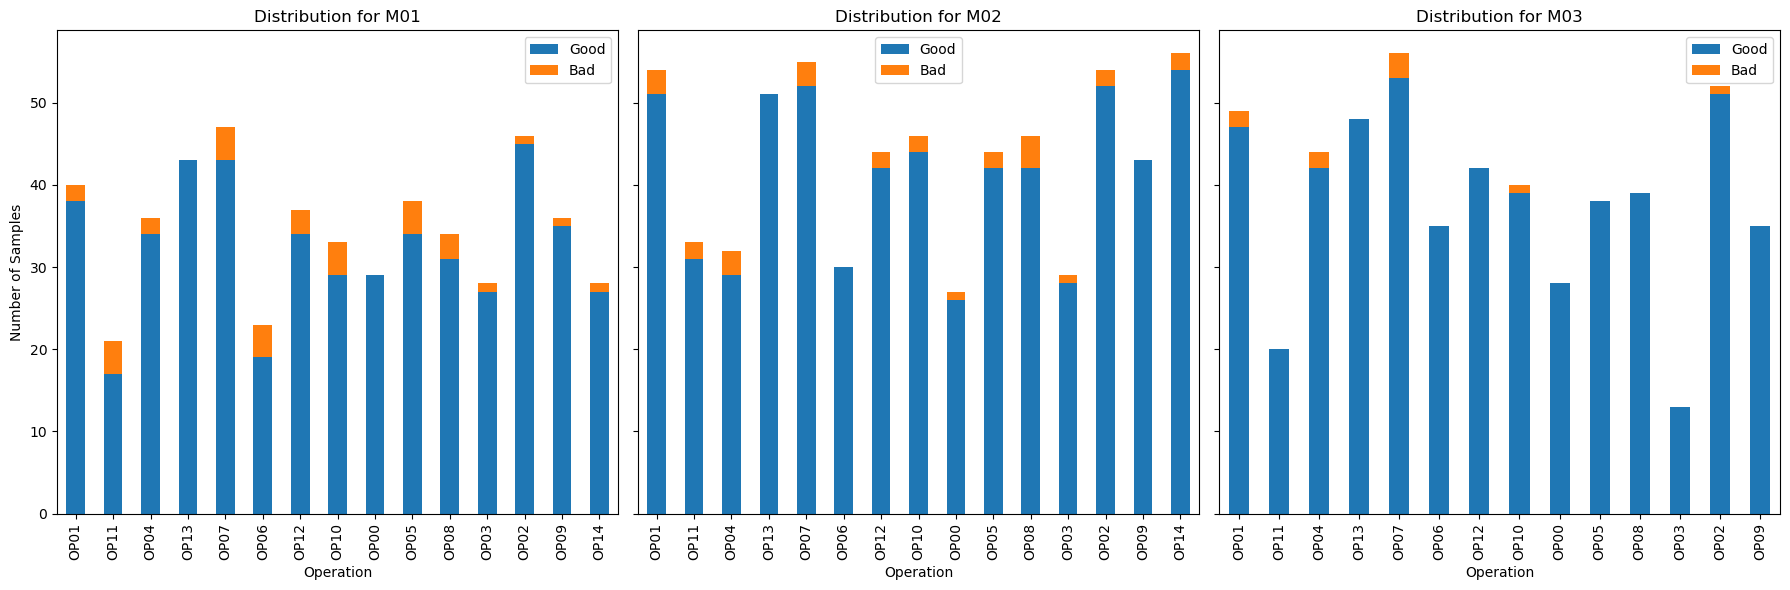

In [11]:


# Define the root directory where your data is stored
data_root = "./data/"


# Initialize counters
machine_operation_counts = []

# Iterate through the directory structure
for machine in ['M01', 'M02', 'M03']:
    for operation in os.listdir(os.path.join(data_root, machine)):
        if os.path.isdir(os.path.join(data_root, machine, operation)):
            good_count = len([file for file in os.listdir(os.path.join(data_root, machine, operation, 'good')) if file.endswith('.h5')])

            # Check if the 'bad' directory exists
            bad_directory = os.path.join(data_root, machine, operation, 'bad')
            if os.path.exists(bad_directory):
                bad_count = len([file for file in os.listdir(bad_directory) if file.endswith('.h5')])
            else:
                bad_count = 0

            machine_operation_counts.append({
                'Machine': machine,
                'Operation': operation,
                'Good': good_count,
                'Bad': bad_count
            })

# Convert the counts to a DataFrame for visualization
df = pd.DataFrame(machine_operation_counts)

# Create three separate subplots
machines = df['Machine'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, machine in enumerate(machines):
    subset = df[df['Machine'] == machine]
    ax = subset.set_index('Operation')[['Good', 'Bad']].plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    ax.set_xlabel('Operation')
    ax.set_ylabel('Number of Samples')
    ax.set_title(f'Distribution for {machine}')
    ax.legend()

# Adjust the layout
plt.tight_layout()
plt.show()


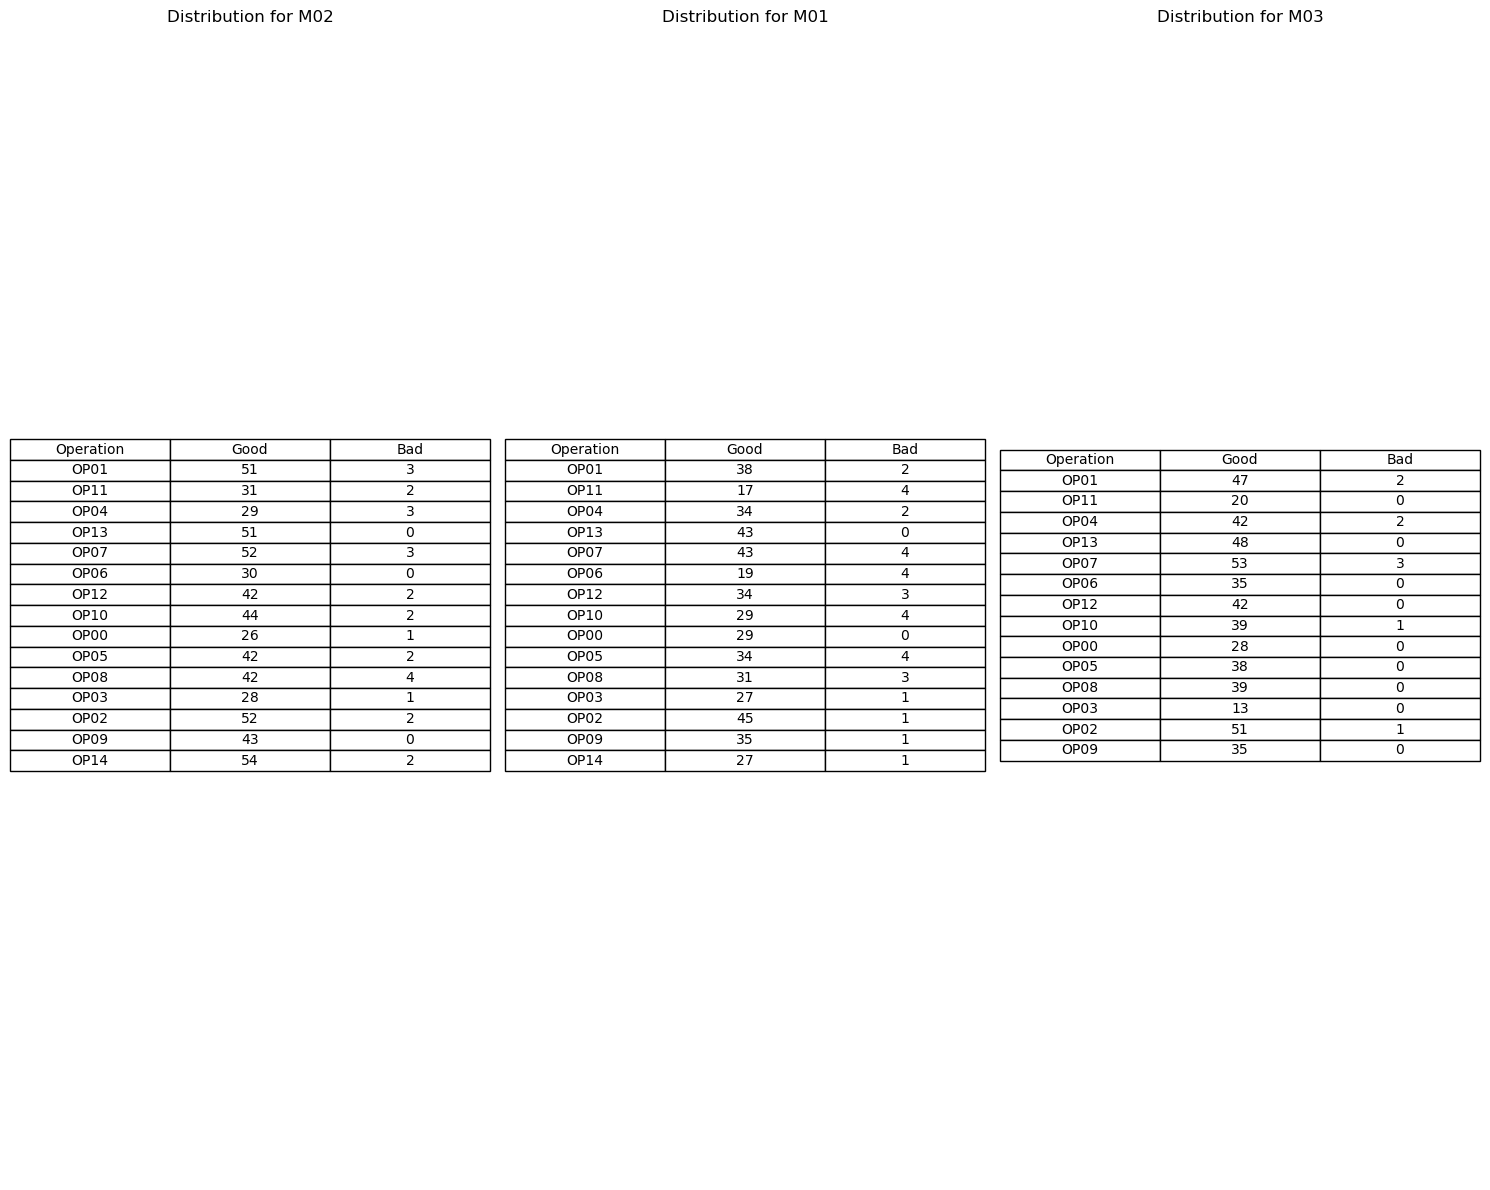

In [12]:


# Define the root directory where your data is stored
data_root = "./data/"



# Initialize counters
machine_operation_counts = []

# Iterate through the directory structure
for machine in ['M01', 'M02', 'M03']:
    for operation in os.listdir(os.path.join(data_root, machine)):
        if os.path.isdir(os.path.join(data_root, machine, operation)):
            good_count = len([file for file in os.listdir(os.path.join(data_root, machine, operation, 'good')) if file.endswith('.h5')])

            # Check if the 'bad' directory exists
            bad_directory = os.path.join(data_root, machine, operation, 'bad')
            if os.path.exists(bad_directory):
                bad_count = len([file for file in os.listdir(bad_directory) if file.endswith('.h5')])
            else:
                bad_count = 0

            machine_operation_counts.append({
                'Machine': machine,
                'Operation': operation,
                'Good': good_count,
                'Bad': bad_count
            })

# Convert the counts to a DataFrame for visualization
df = pd.DataFrame(machine_operation_counts)

# Sort the DataFrame by 'Operation'
df_sorted = df.sort_values(by='Operation')

# Get unique machine values
machines = df_sorted['Machine'].unique()



# Create three separate tables
fig, axes = plt.subplots(1, 3, figsize=(15, 12))


for i, machine in enumerate(machines):
    subset = df[df['Machine'] == machine]
    table_data = subset[['Operation', 'Good', 'Bad']]
    ax = axes[i]
    ax.axis('off')
    
    table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
    ax.set_title(f'Distribution for {machine}')

# Adjust the layout
plt.tight_layout()
plt.show()



In [13]:

# Define the root directory where your data is stored
data_root = "./data/"

def find_all_h5s_in_dir(s_dir):
    """
    list all .h5 files in a directory
    """

    fileslist = []
    for root, dirs, files in os.walk(s_dir):
        for file in files:
            if file.endswith(".h5"):
                fileslist.append(file)
    return fileslist


# Define a function to load H5 files and calculate the duration in seconds
def load_h5_files_and_calculate_duration(data_root):
    data_list = []
    labels = []

    for machine in ['M01', 'M02', 'M03']:
        for operation in os.listdir(os.path.join(data_root, machine)):
            if os.path.isdir(os.path.join(data_root, machine, operation)):
                for label in ['good', 'bad']:
                    data_path = os.path.join(data_root, machine, operation, label)
                    files = find_all_h5s_in_dir(data_path)

                    for file in files:
                        file_path = os.path.join(data_path, file)
                        with h5py.File(file_path, 'r') as f:
                            vibration_data = f['vibration_data'][:]
                            samples_s = len(vibration_data) / 2000  # Assuming a data sampling frequency of 2000 Hz

                        data_list.append({
                            'Machine': machine,
                            'Operation': operation,
                            'Sample Type': label,
                            'File Name': file,
                            'Duration (s)': samples_s
                        })

    return data_list

# Create a DataFrame
data_list = load_h5_files_and_calculate_duration(data_root)
df = pd.DataFrame(data_list)

# Print the DataFrame
print(df)



     Machine Operation Sample Type                 File Name  Duration (s)
0        M01      OP01        good  M01_Feb_2019_OP01_002.h5        29.400
1        M01      OP01        good  M01_Aug_2019_OP01_003.h5        29.696
2        M01      OP01        good  M01_Aug_2019_OP01_011.h5        30.208
3        M01      OP01        good  M01_Feb_2021_OP01_008.h5        29.696
4        M01      OP01        good  M01_Aug_2019_OP01_005.h5        30.208
...      ...       ...         ...                       ...           ...
1697     M03      OP09        good  M03_Aug_2020_OP09_001.h5       101.888
1698     M03      OP09        good  M03_Aug_2021_OP09_000.h5       103.936
1699     M03      OP09        good  M03_Aug_2019_OP09_010.h5       102.400
1700     M03      OP09        good  M03_Aug_2019_OP09_005.h5       104.452
1701     M03      OP09        good  M03_Feb_2021_OP09_003.h5       103.392

[1702 rows x 5 columns]


In [14]:
csv_filename = 'dataset_info.csv'
df.to_csv(csv_filename, index=False)

# Print a message to confirm the file has been saved
print(f"DataFrame saved to {csv_filename}")

DataFrame saved to dataset_info.csv


In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def datafile_read(files, dataset_labels=None, plotting=True):
    """Loads and plots data from multiple datafiles in separate subplots for each axis with dataset labels.

    Keyword Arguments:
        files {list} -- List of file paths
        dataset_labels {list} -- List of dataset labels for legends (optional)

    Returns:
        list of ndarrays -- List of raw data arrays
    """
    all_data = []
    max_samples = 0

    for file in files:
        with h5py.File(file, 'r') as f:
            vibration_data = f['vibration_data'][:]
        all_data.append(vibration_data)
        max_samples = max(max_samples, len(vibration_data))

    # Interpolation for the x-axis plot
    freq = 2000
    samples_s = max_samples / freq
    samples = np.linspace(0, samples_s, max_samples)

    if plotting:
        fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

        for i, data in enumerate(all_data):
            if len(data) < max_samples:
                # Pad the shorter dataset with NaN values
                padding = np.full((max_samples - len(data), 3), np.nan)
                data = np.vstack((data, padding))
            
            if dataset_labels is not None:
                label = dataset_labels[i] if i < len(dataset_labels) else f'Dataset {i + 1}'
            else:
                label = f'Dataset {i + 1}'
            
            axs[0].plot(samples, data[:, 0], label=f'X-axis Vibration Data - {label}')
            axs[1].plot(samples, data[:, 1], label=f'Y-axis Vibration Data - {label}')
            axs[2].plot(samples, data[:, 2], label=f'Z-axis Vibration Data - {label}')

        axs[0].set_ylabel('X-axis Vibration Data')
        axs[1].set_ylabel('Y-axis Vibration Data')
        axs[2].set_ylabel('Z-axis Vibration Data')
        axs[2].set_xlabel('Time [sec]')

        for ax in axs:
            ax.locator_params(axis='y', nbins=10)
            ax.grid()
            ax.legend()

        plt.show()

    return all_data



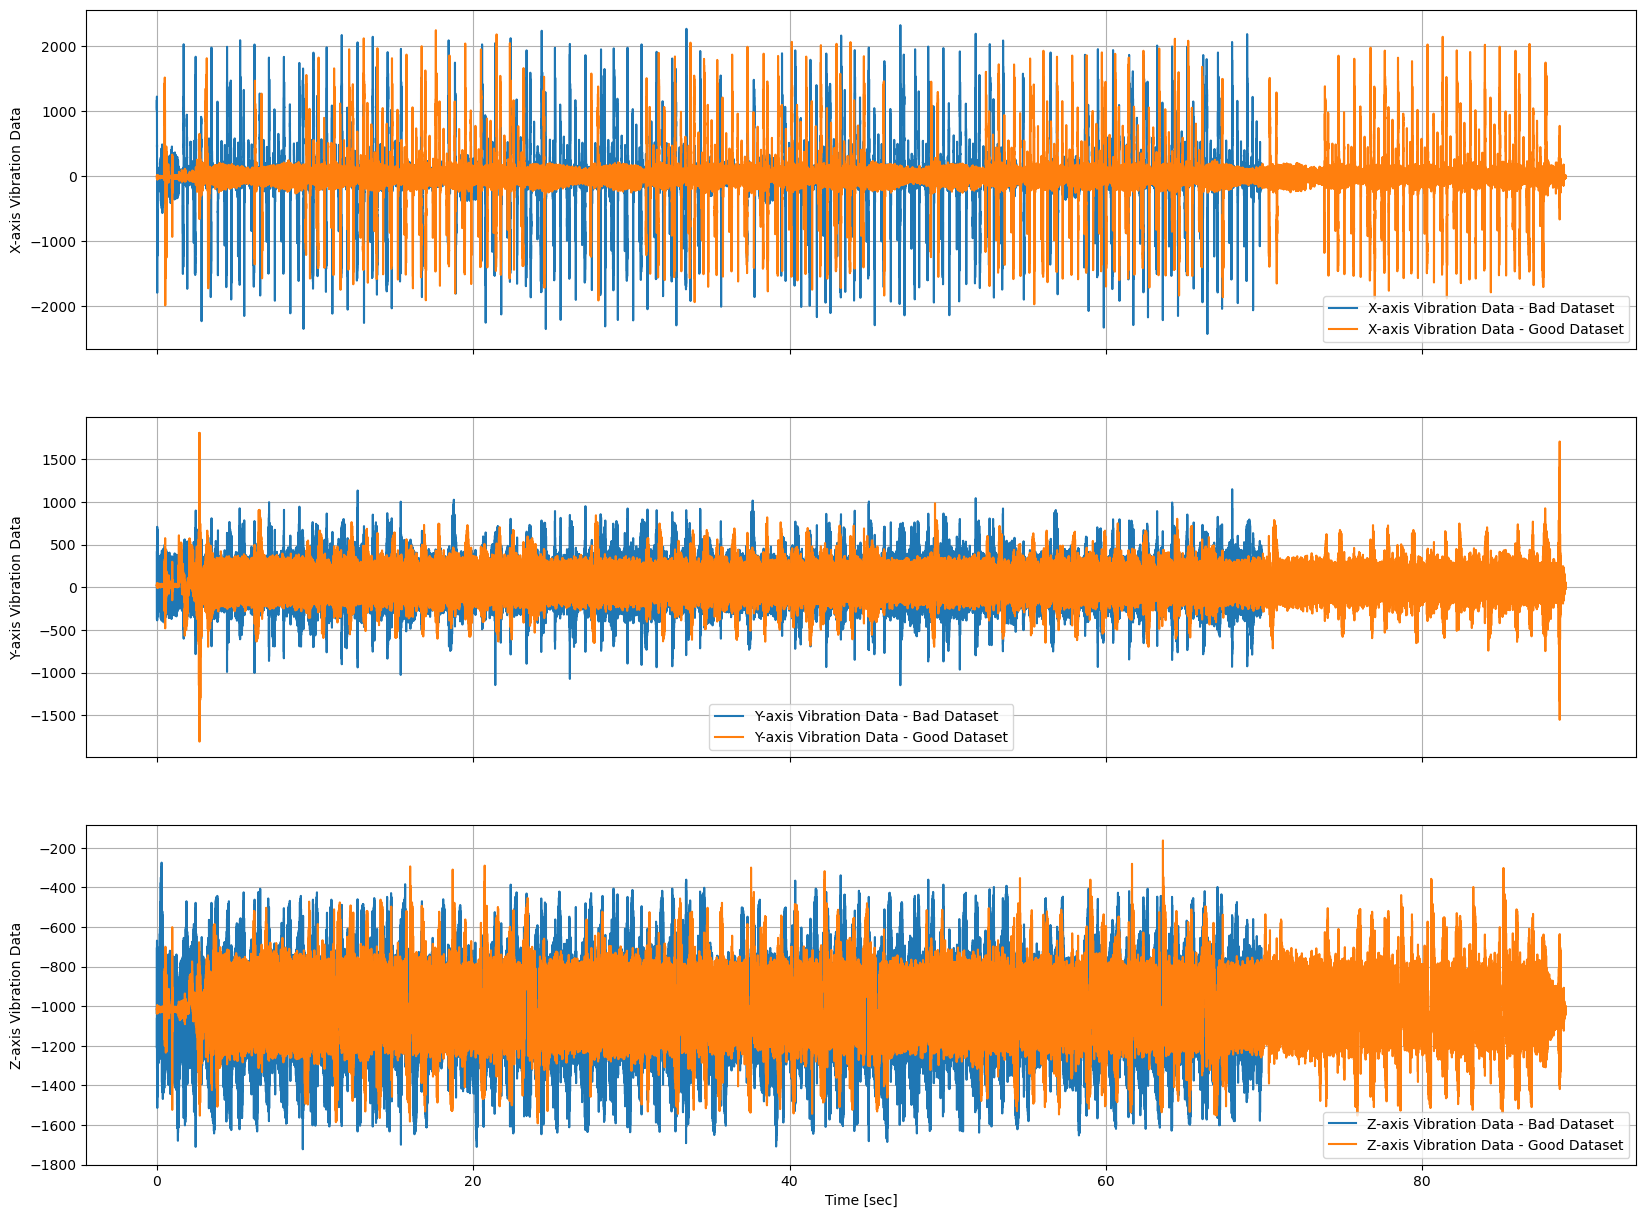

In [16]:
# Example usage:
files=['./data/M01/OP03/bad/M01_Aug_2019_OP03_000.h5', './data/M01/OP03/good/M01_Aug_2019_OP03_009.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)



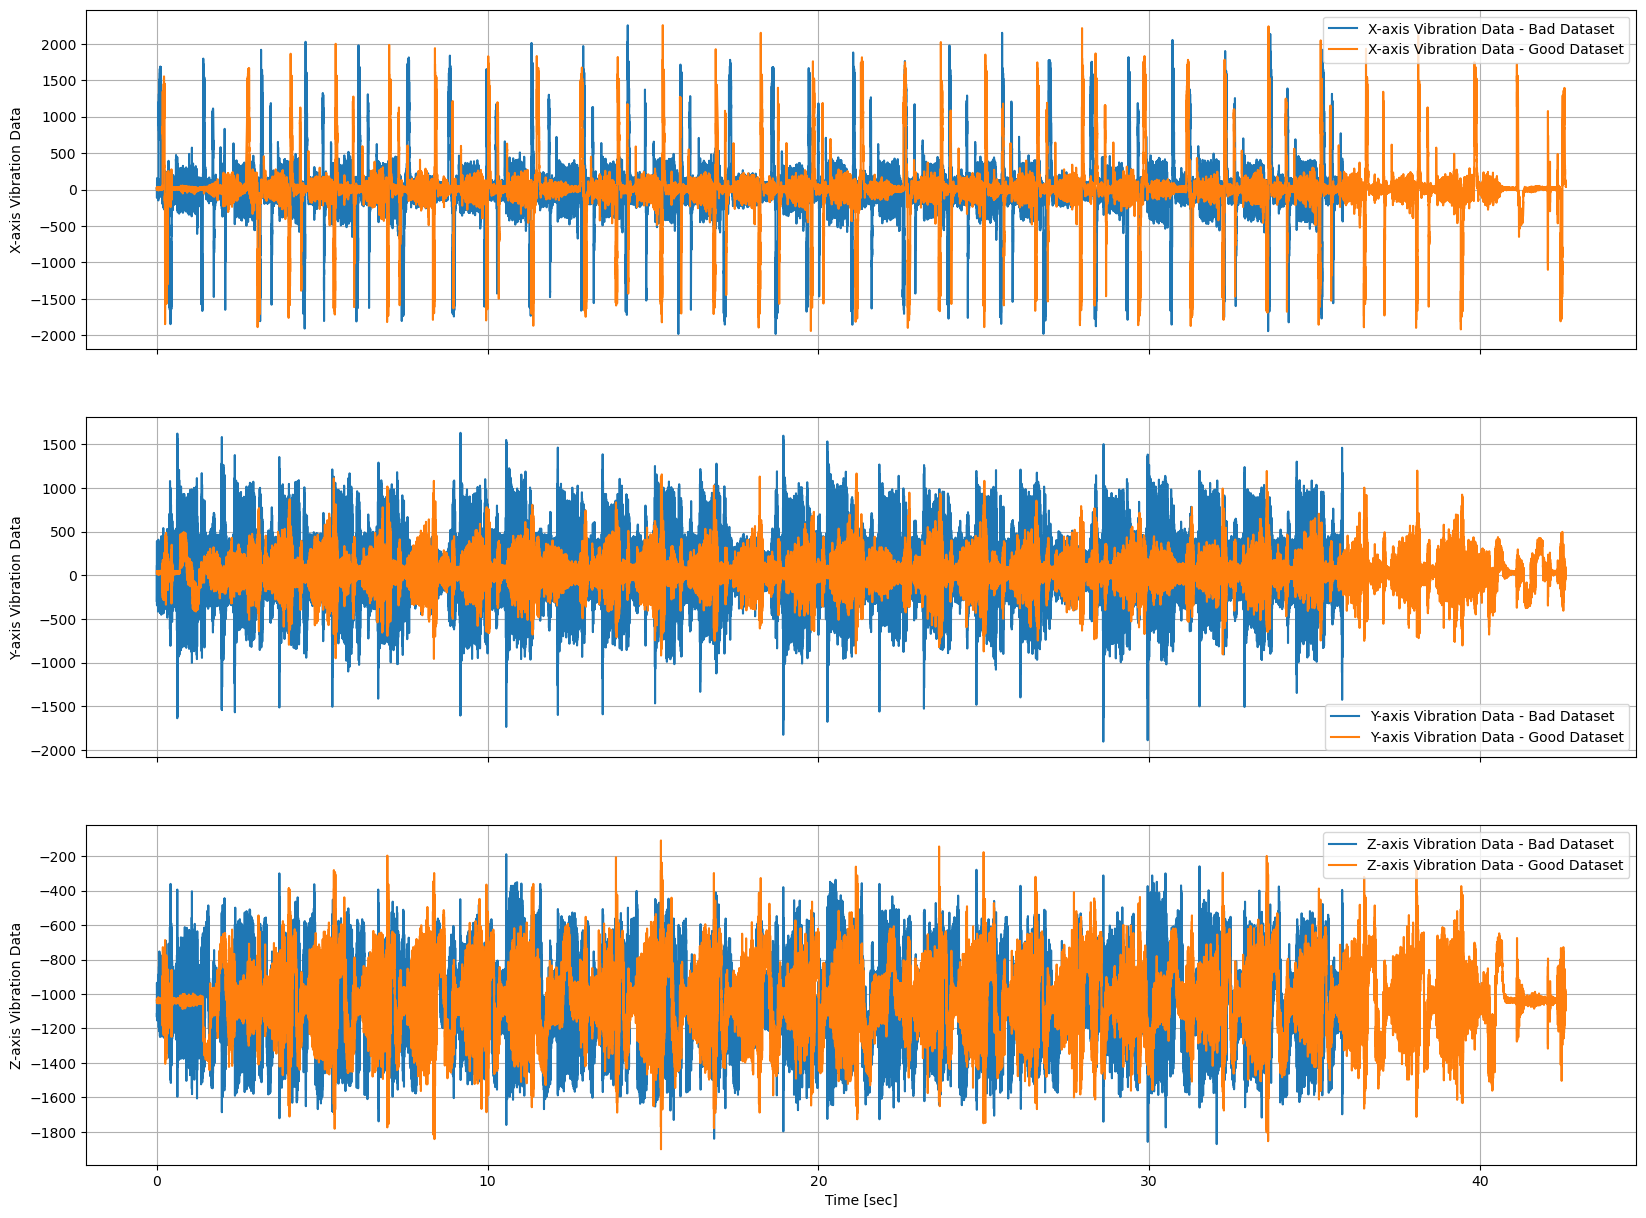

In [13]:
files=['./data/M01/OP02/bad/M01_Feb_2019_OP02_000.h5', './data/M01/OP02/good/M01_Feb_2019_OP02_000.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)


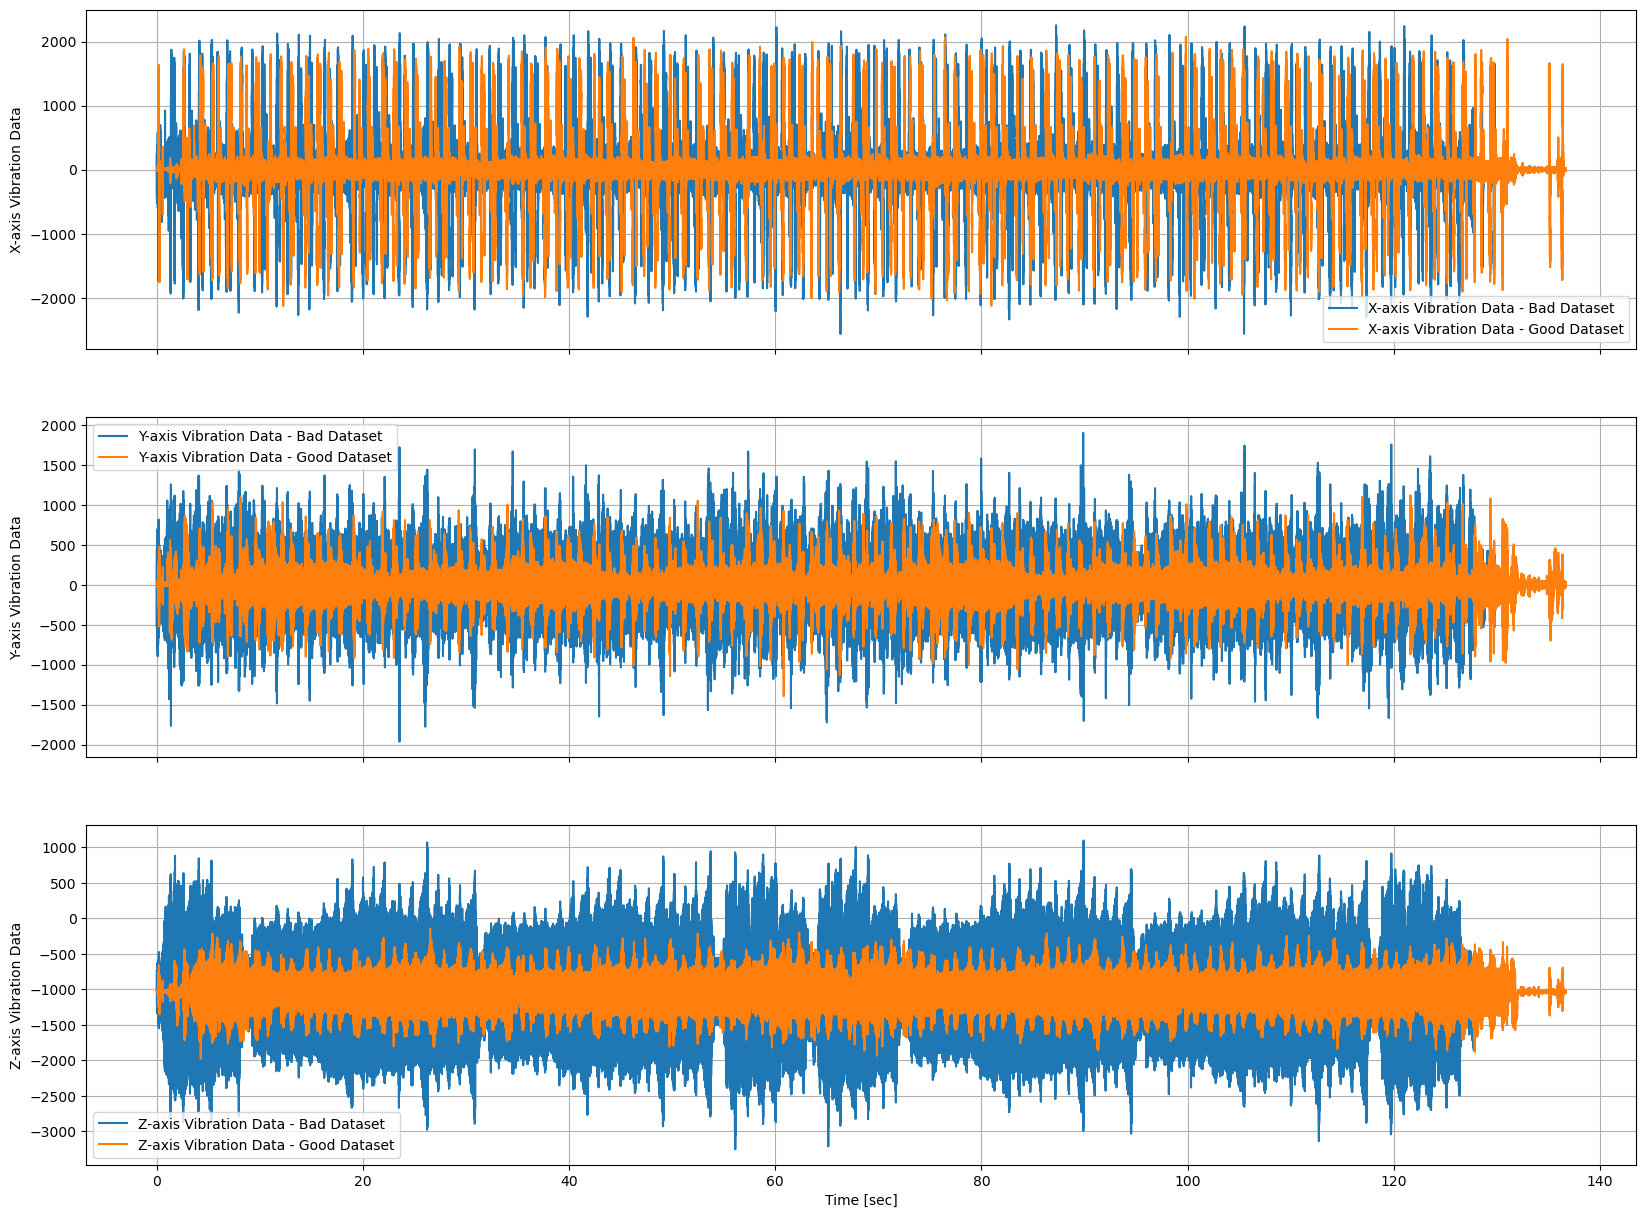

In [14]:
files=['./data/M02/OP00/bad/M02_Feb_2021_OP00_000.h5', './data/M02/OP00/good/M02_Feb_2021_OP00_000.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)


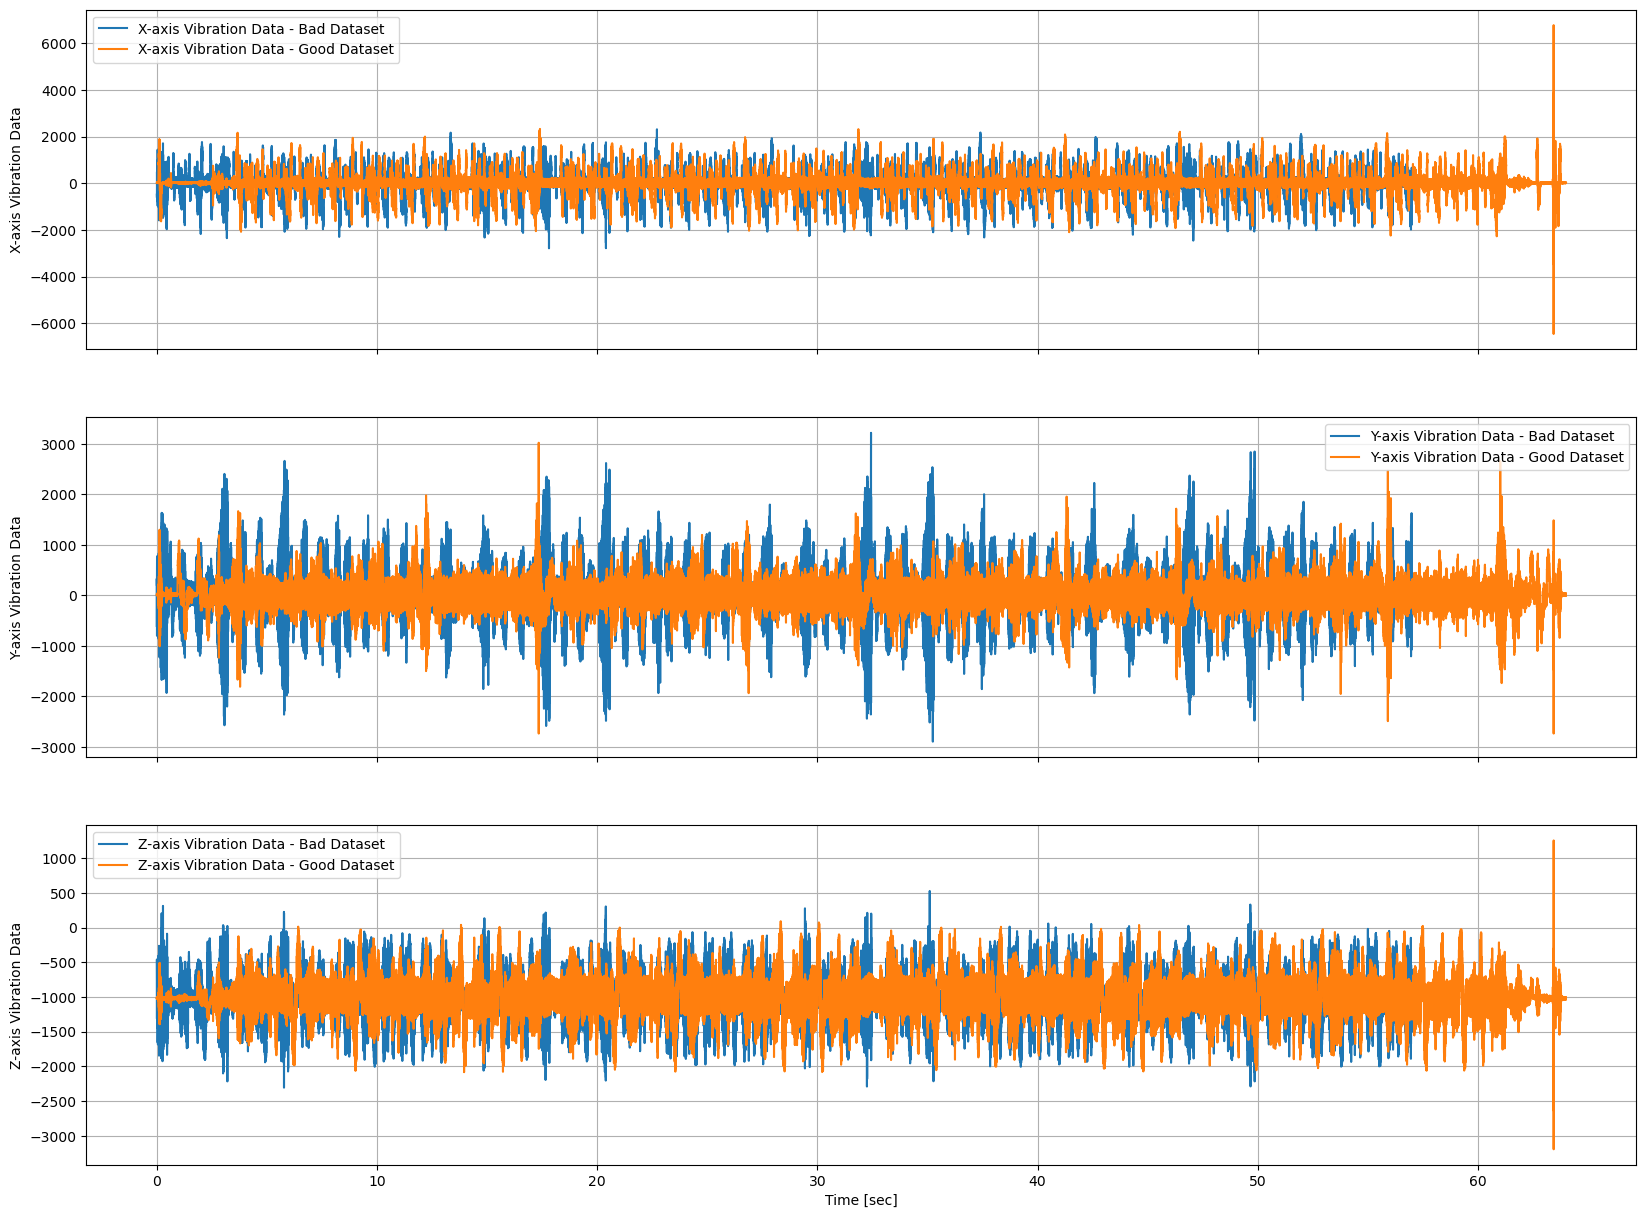

In [15]:
files=['./data/M03/OP04/bad/M03_Aug_2019_OP04_000.h5', './data/M03/OP04/good/M03_Aug_2019_OP04_000.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)


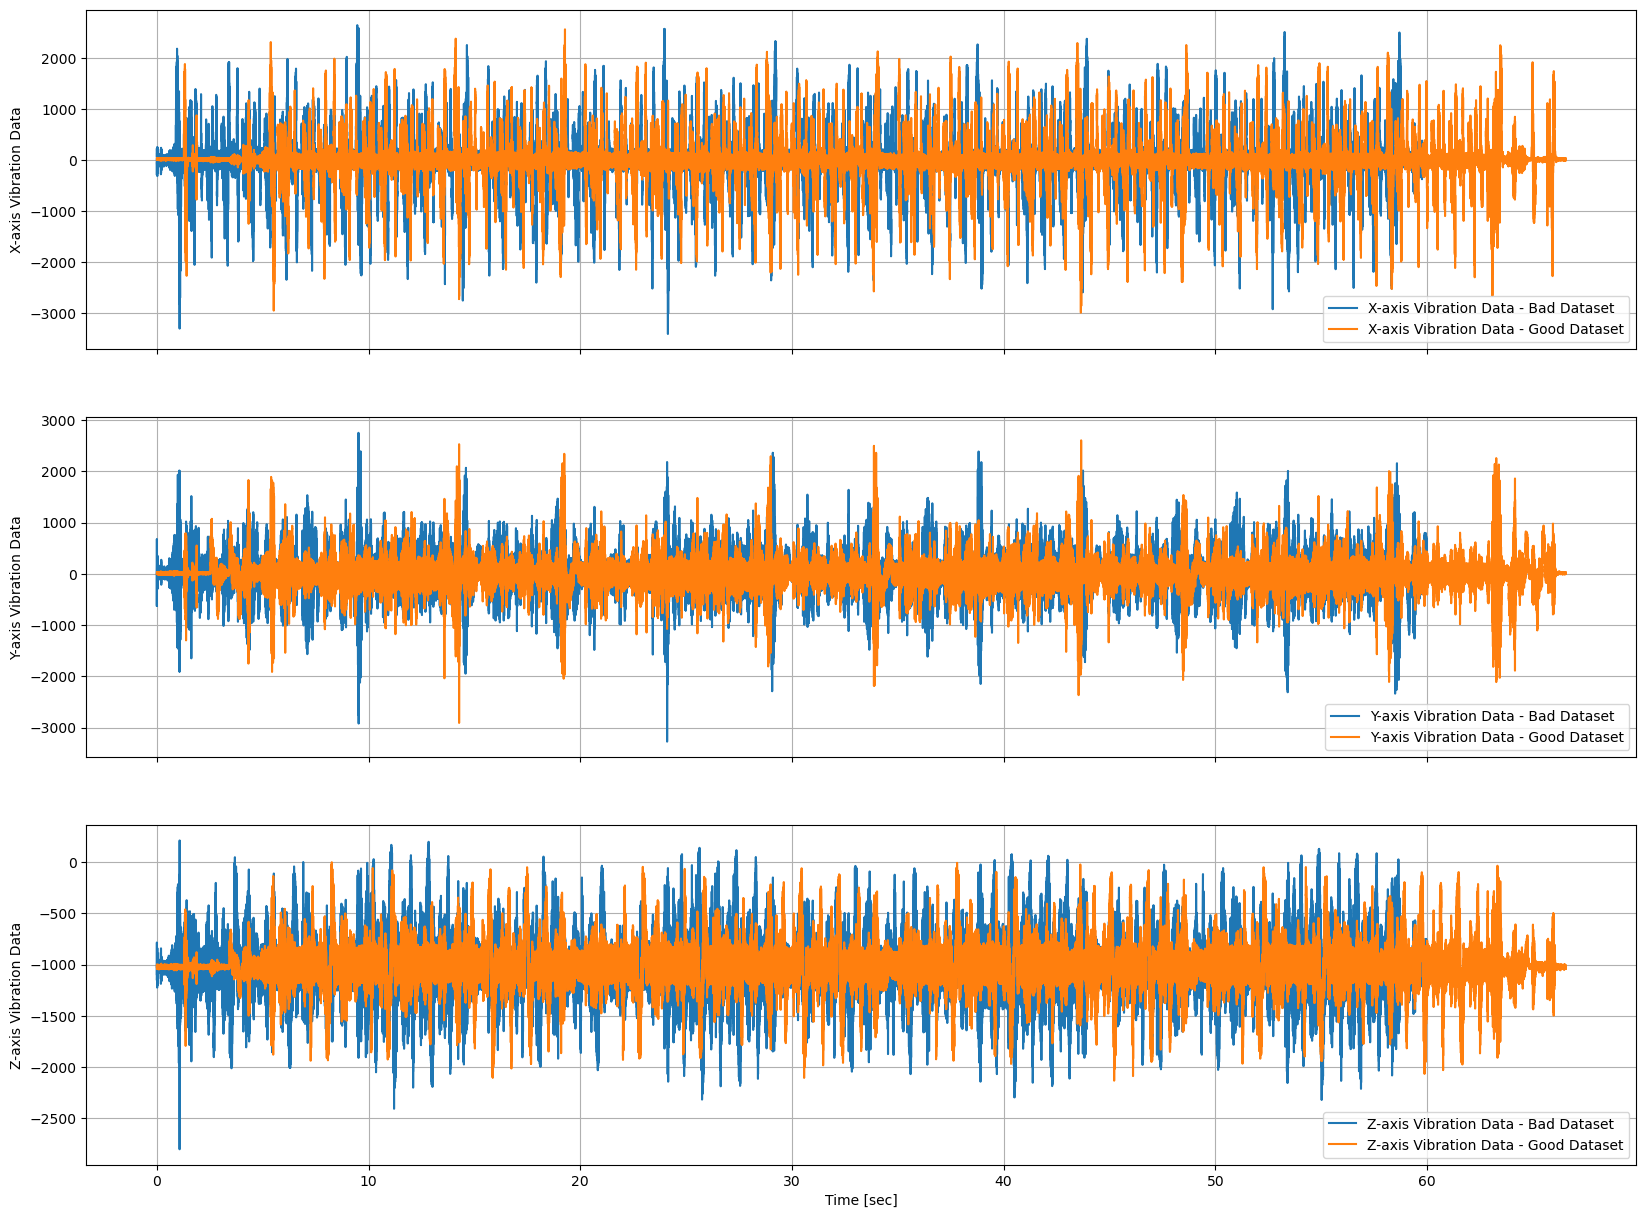

In [16]:
files=['./data/M03/OP04/bad/M03_Feb_2021_OP04_000.h5', './data/M03/OP04/good/M03_Feb_2021_OP04_000.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)


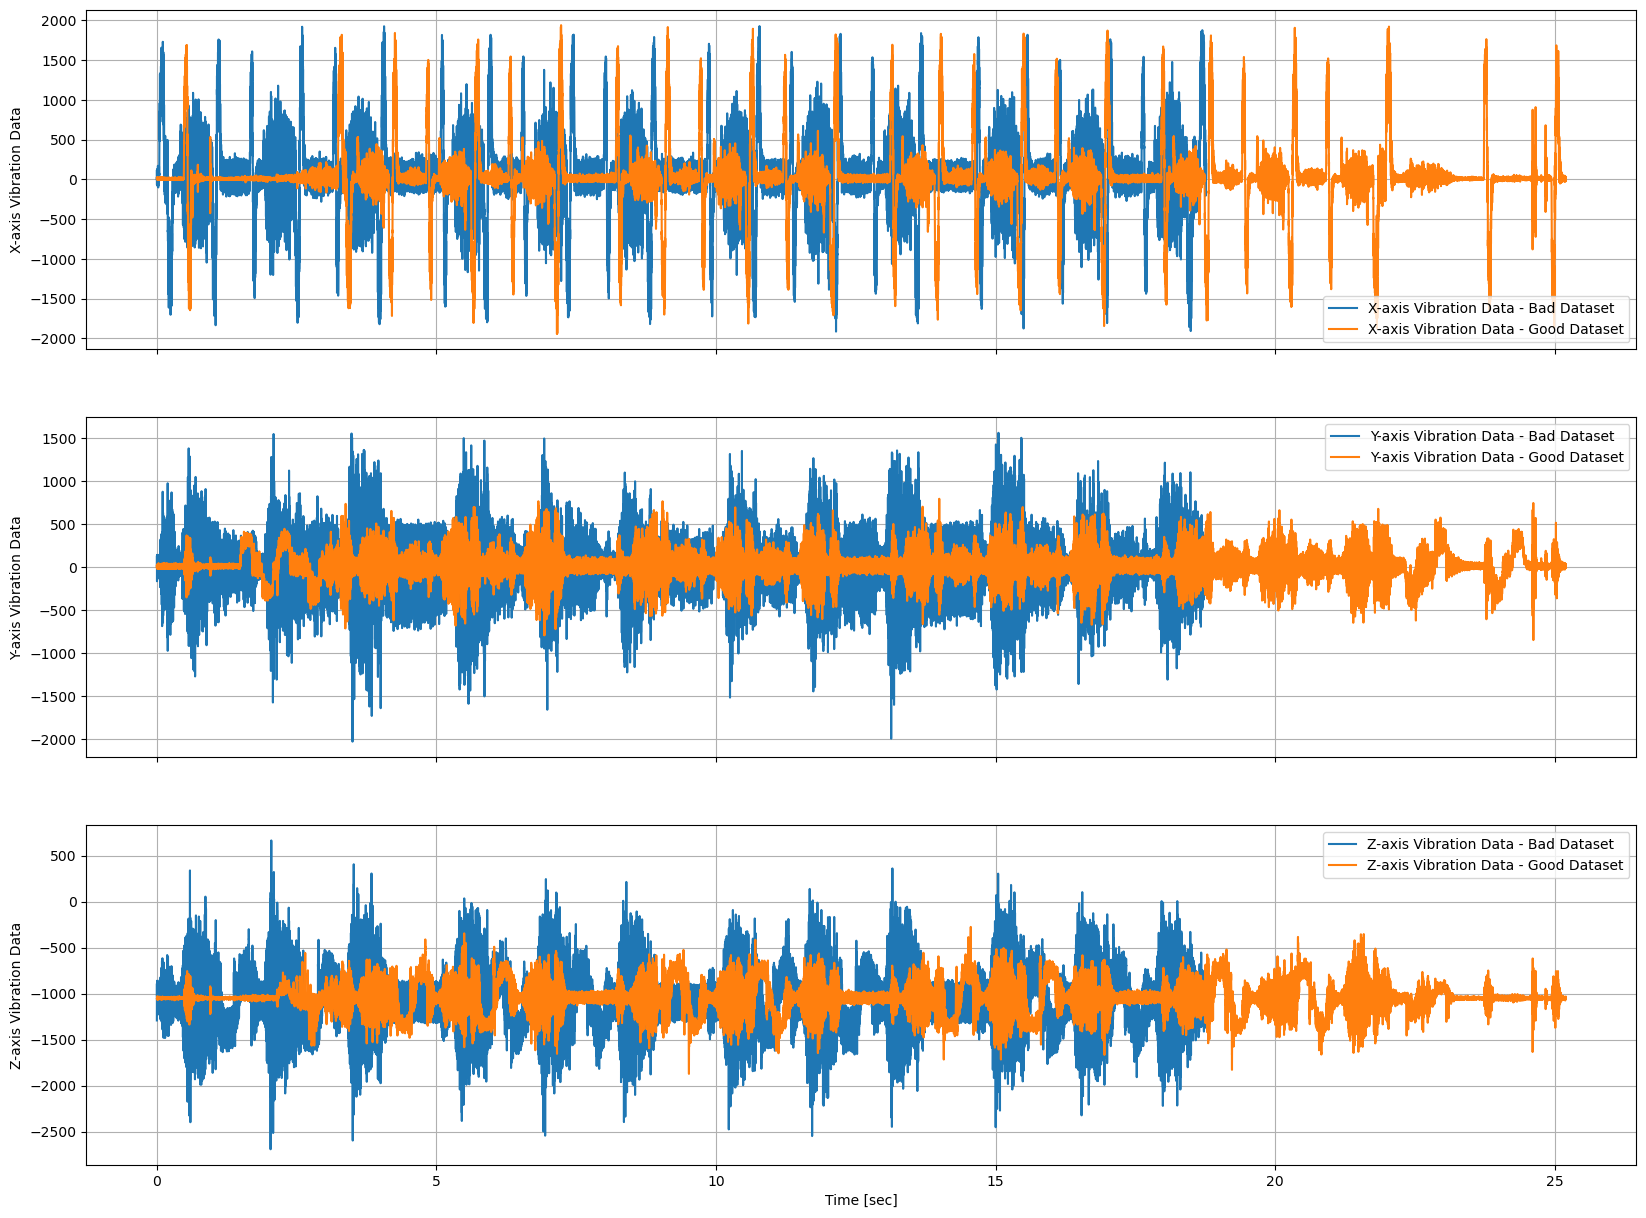

In [17]:
files=['./data/M02/OP07/bad/M02_Feb_2019_OP07_000.h5', './data/M02/OP07/good/M02_Feb_2019_OP07_000.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)


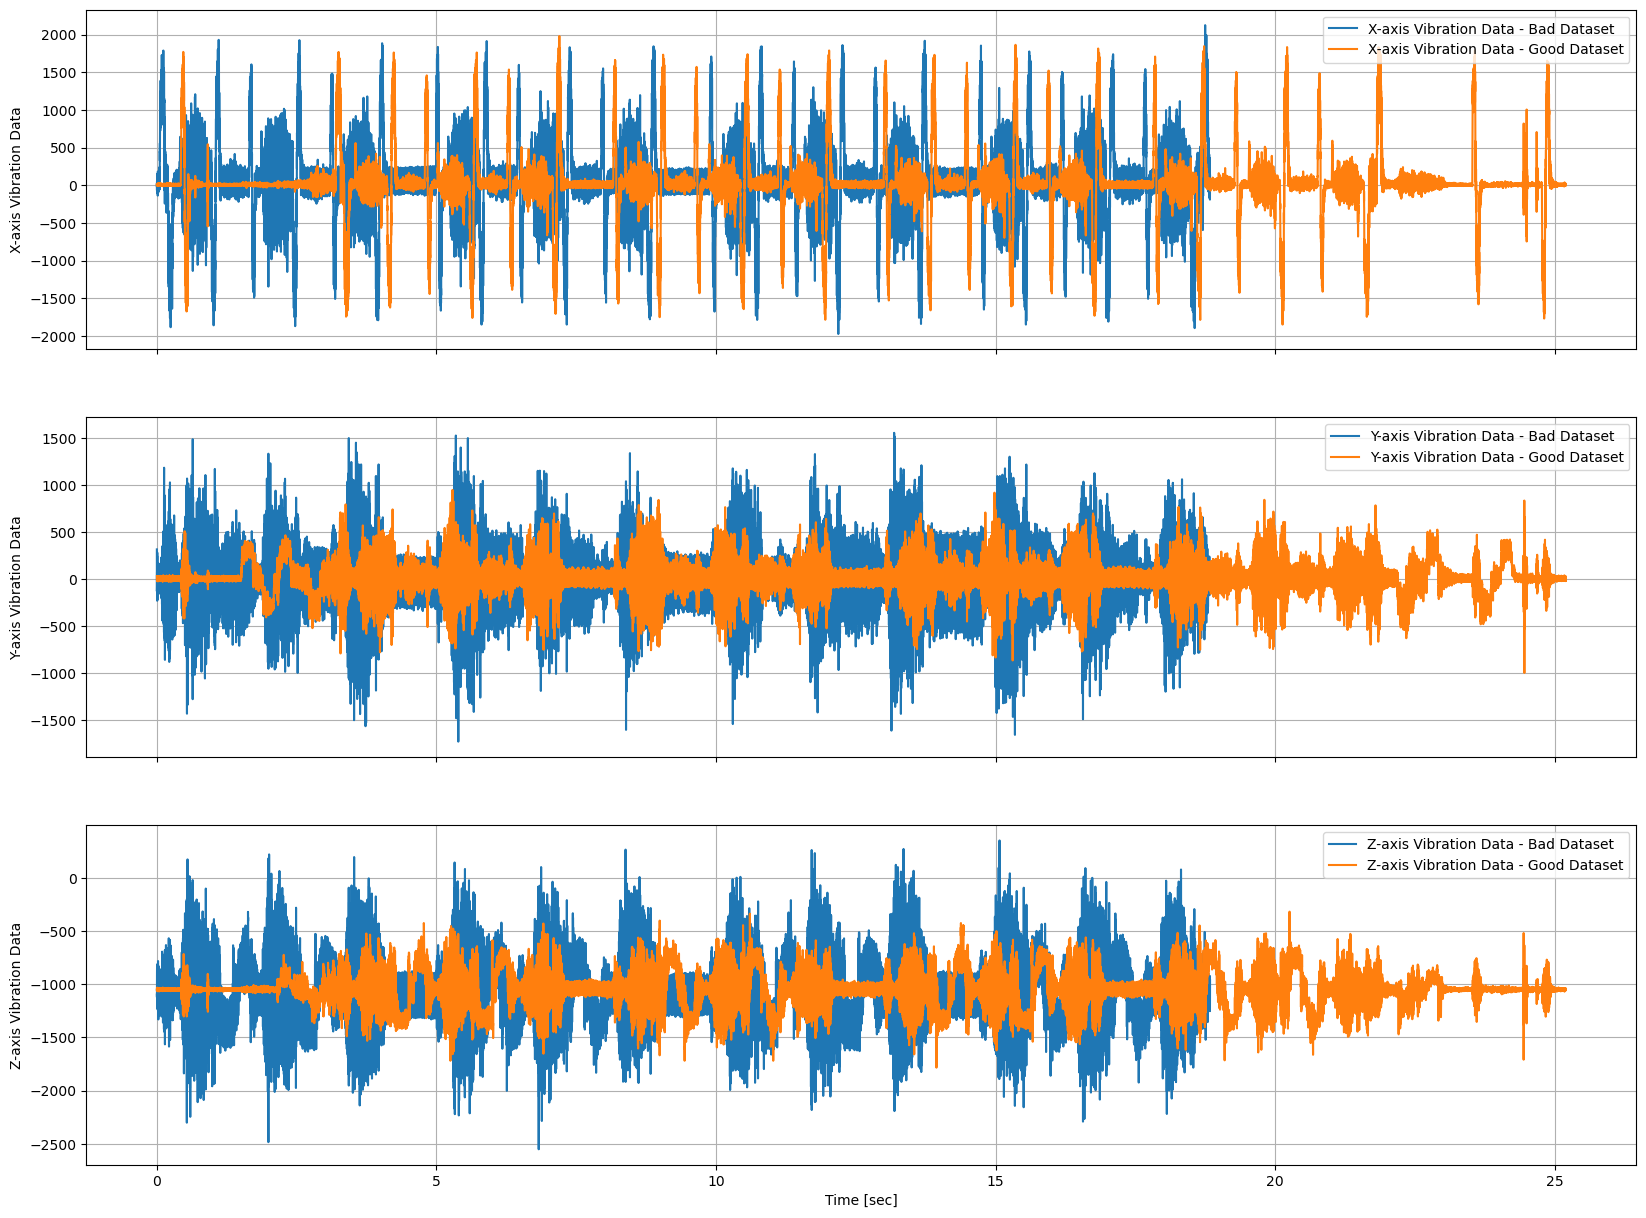

In [18]:
files=['./data/M02/OP07/bad/M02_Feb_2019_OP07_001.h5', './data/M02/OP07/good/M02_Feb_2019_OP07_001.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)

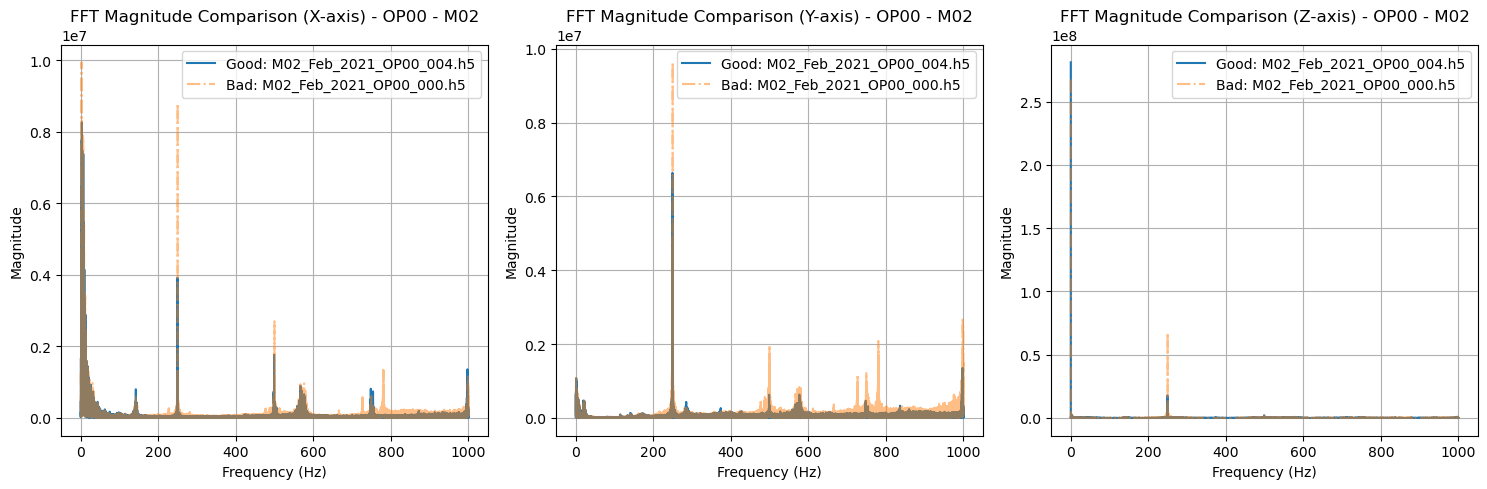

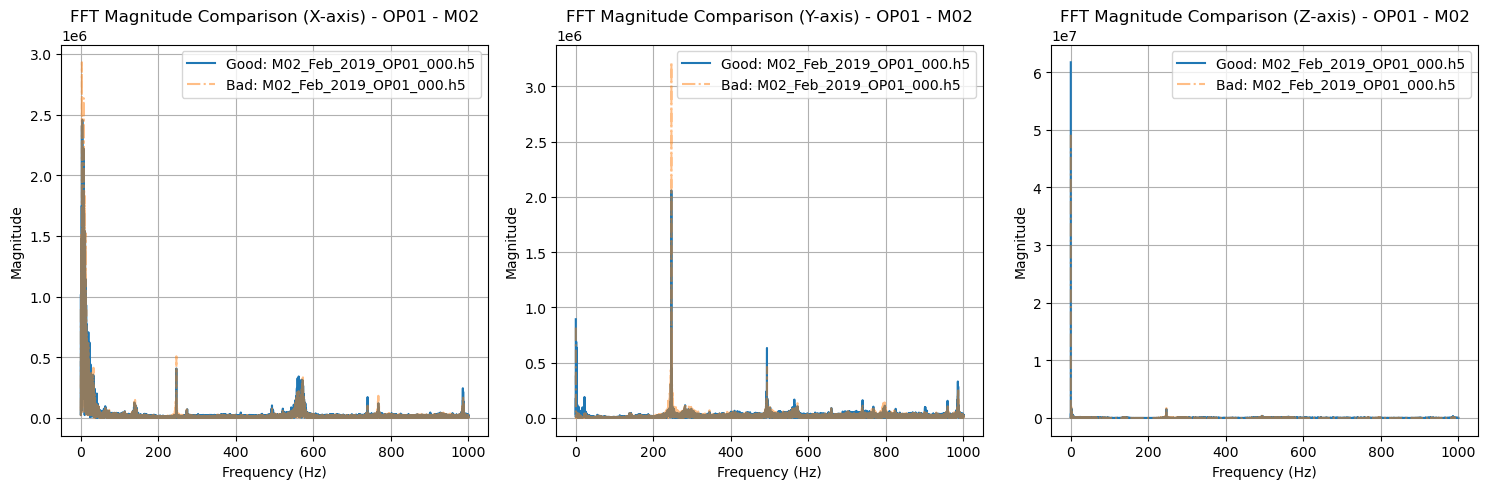

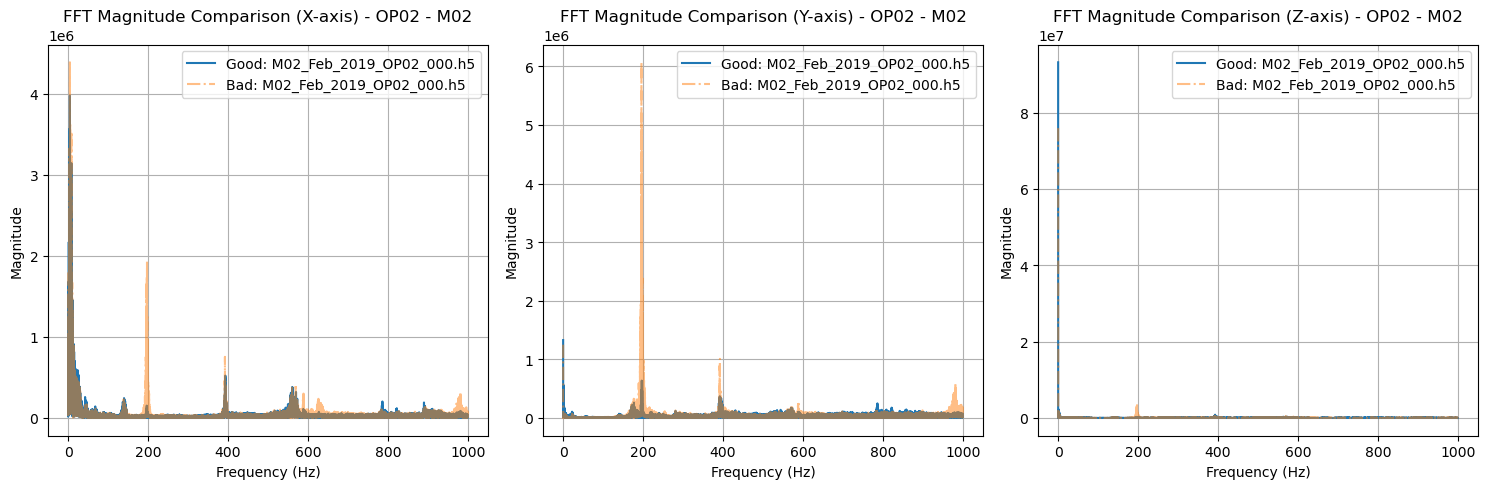

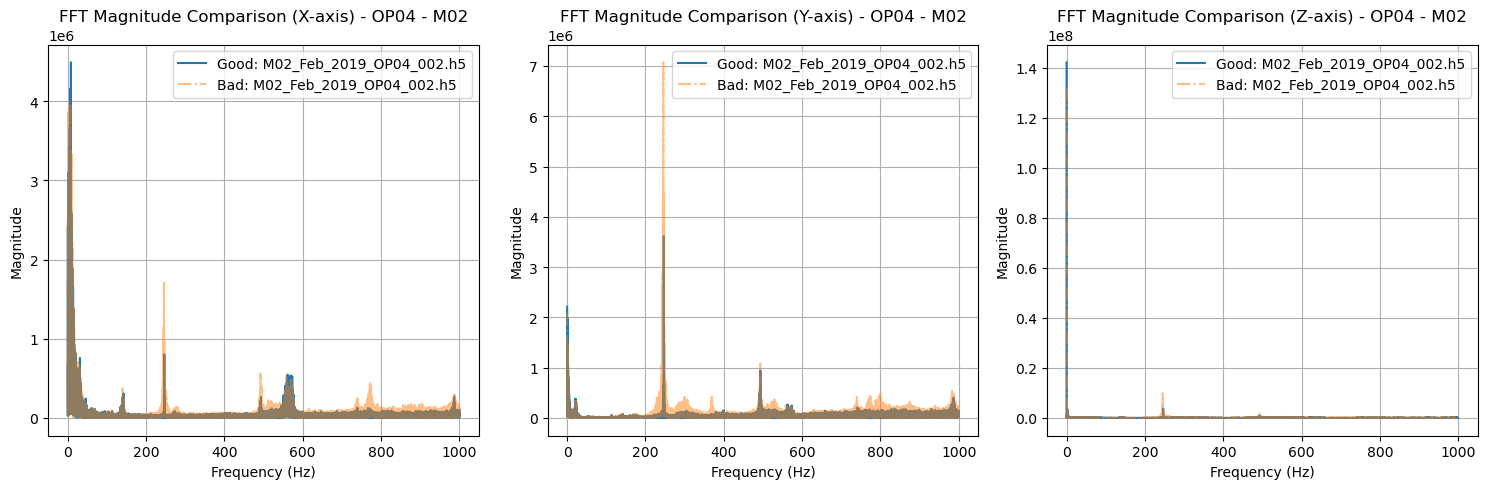

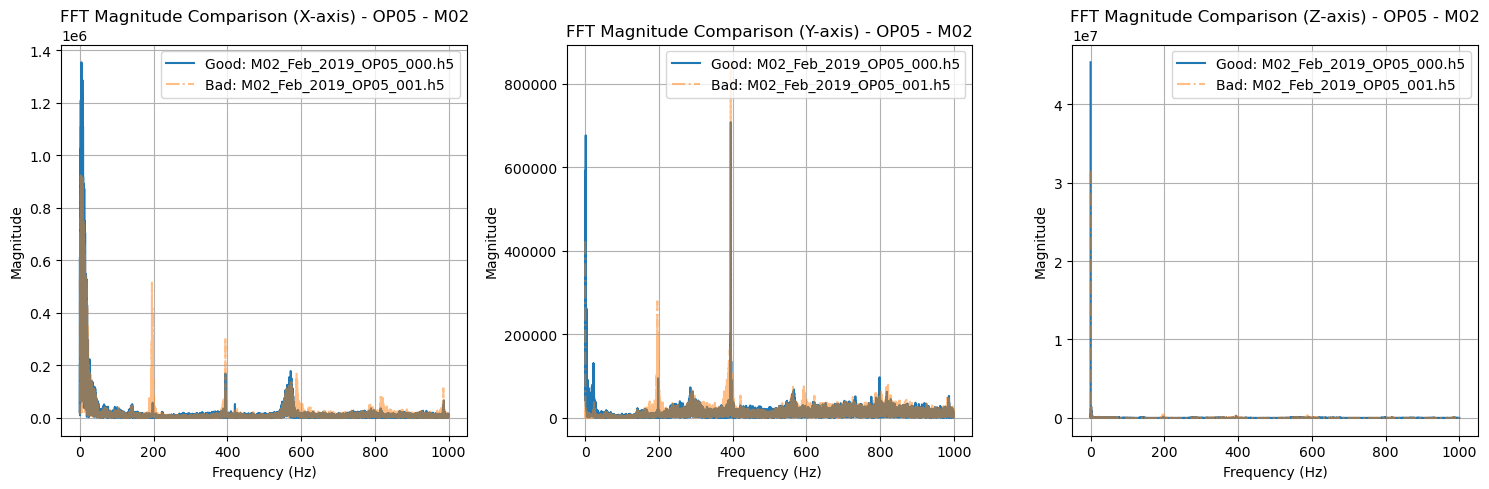

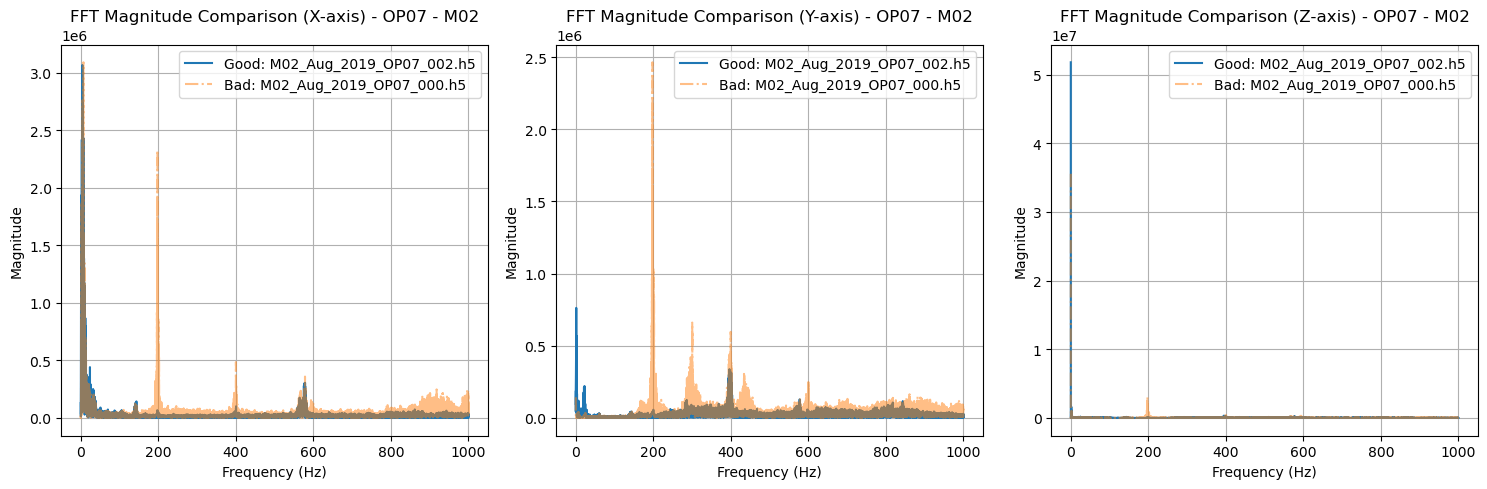

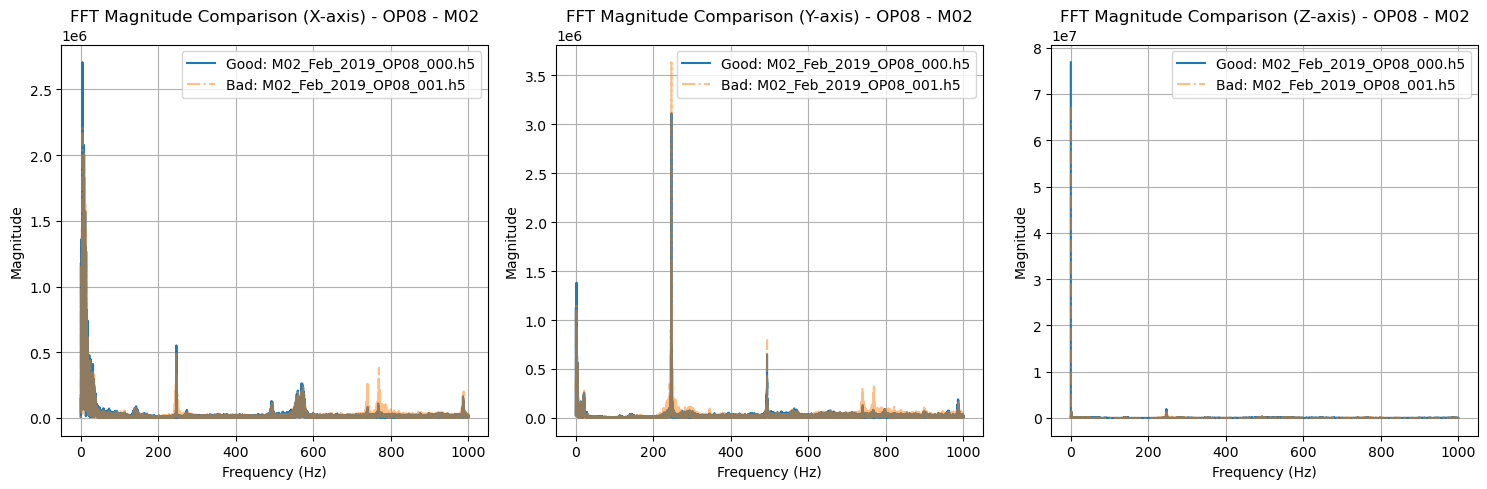

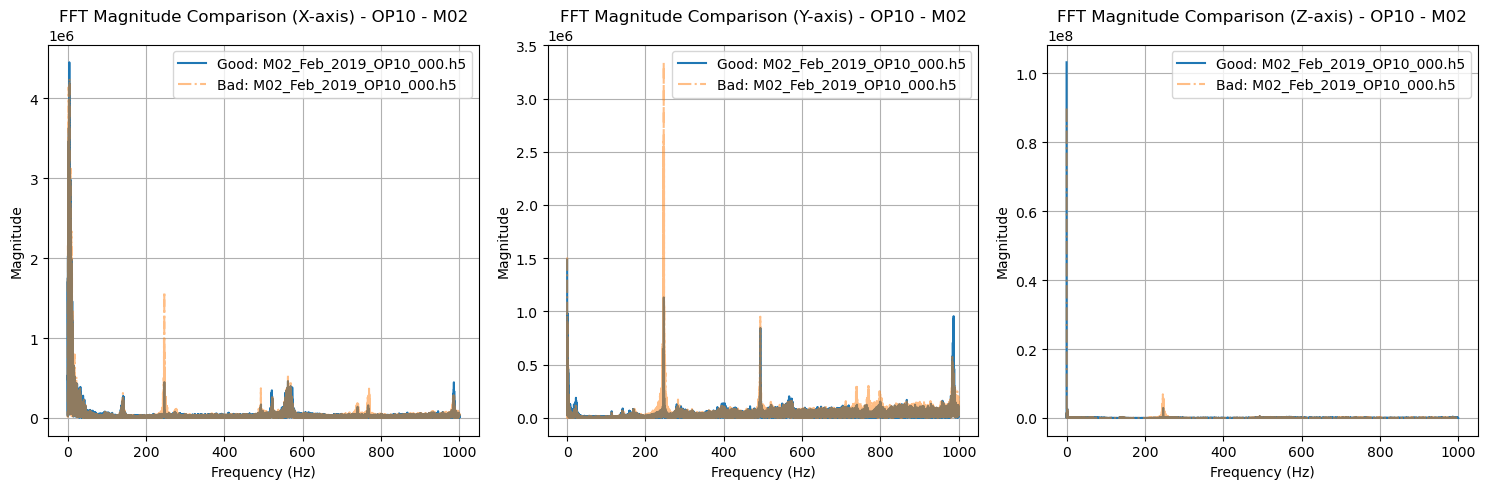

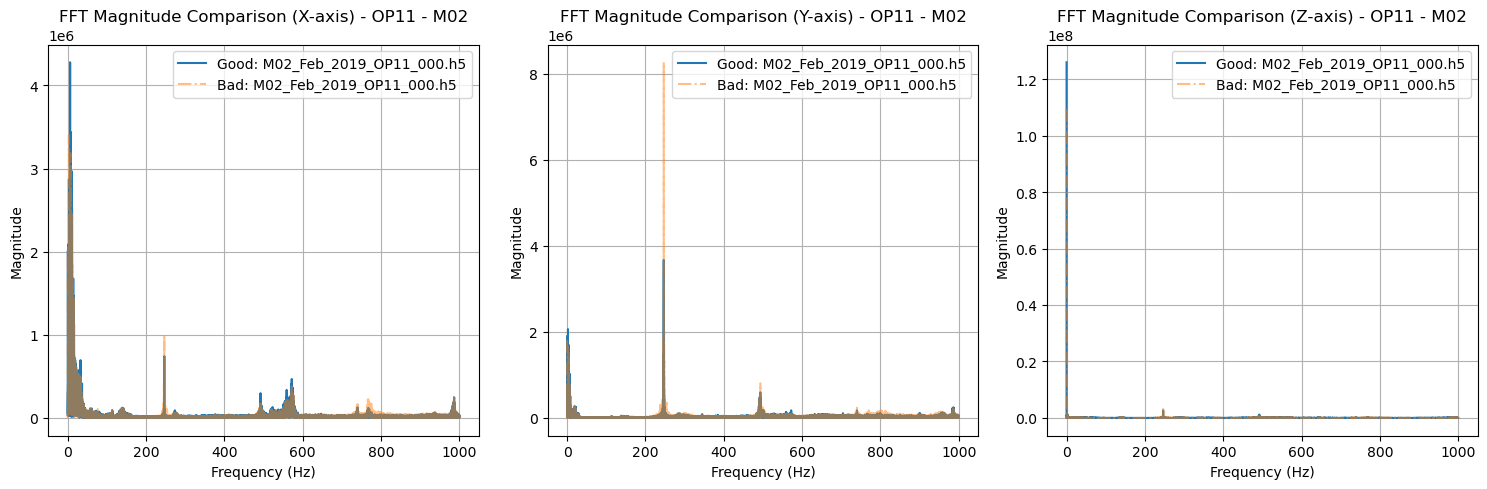

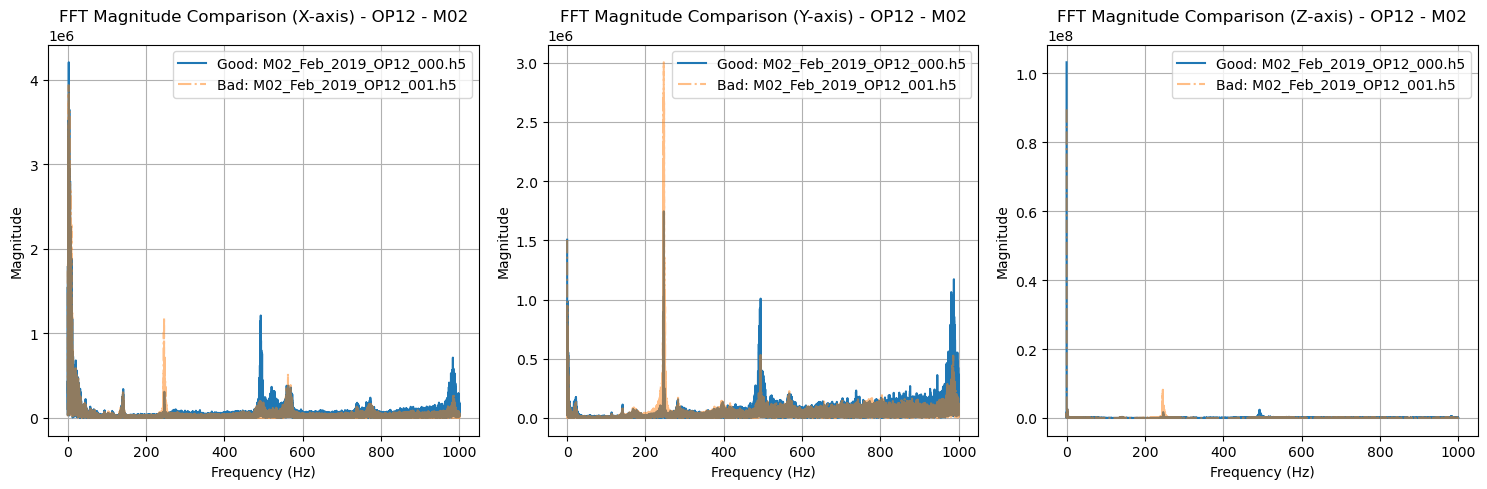

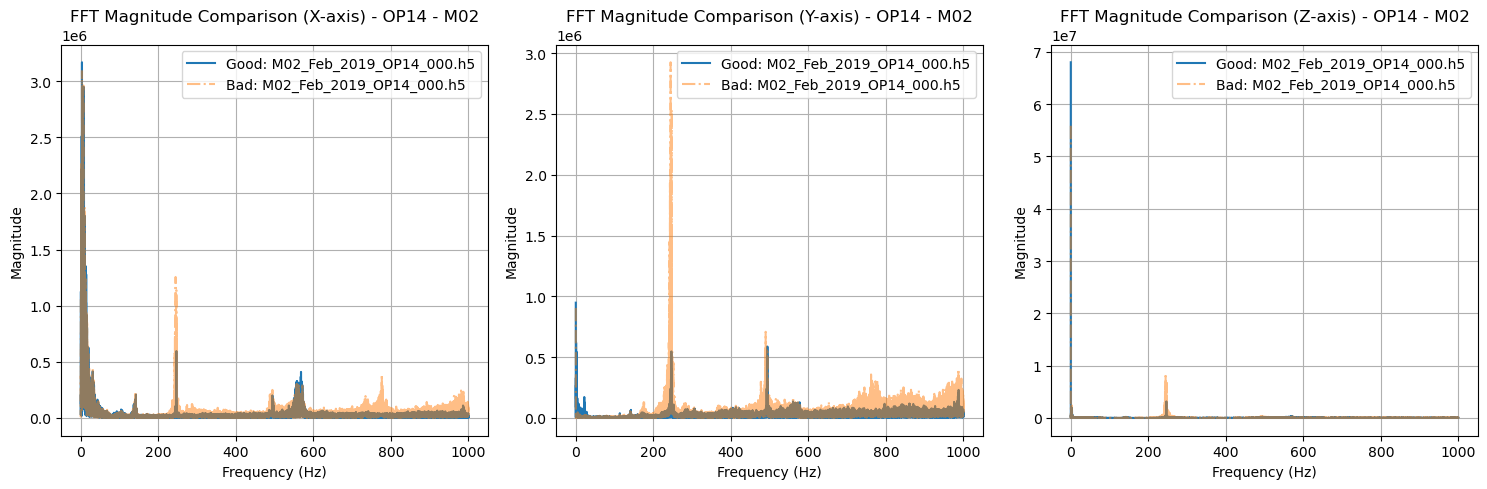

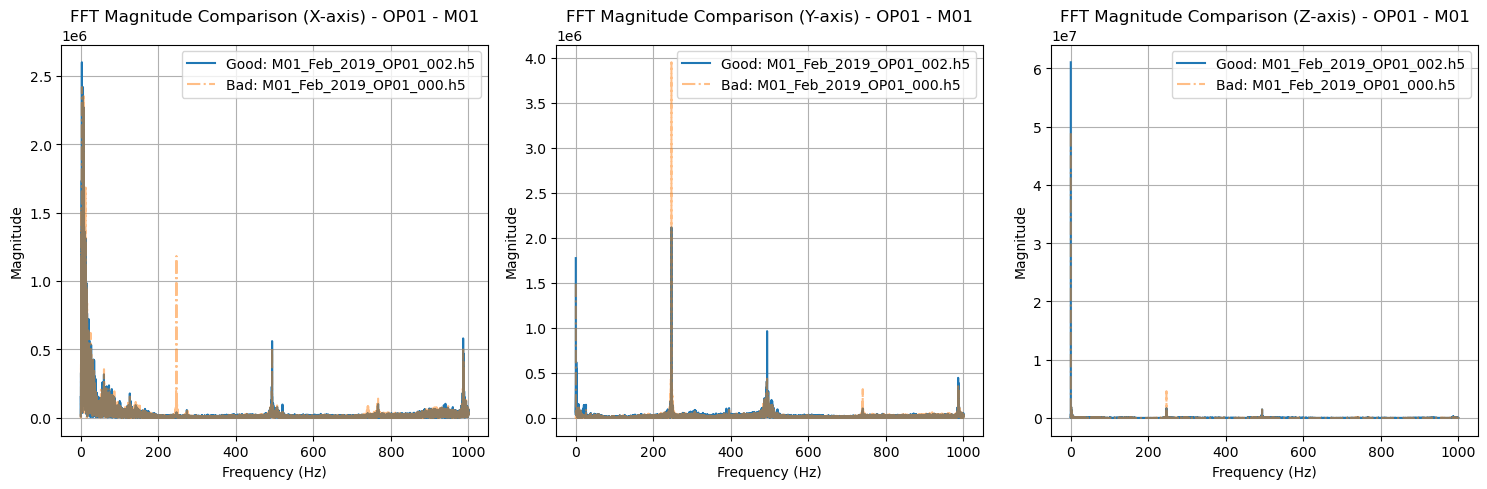

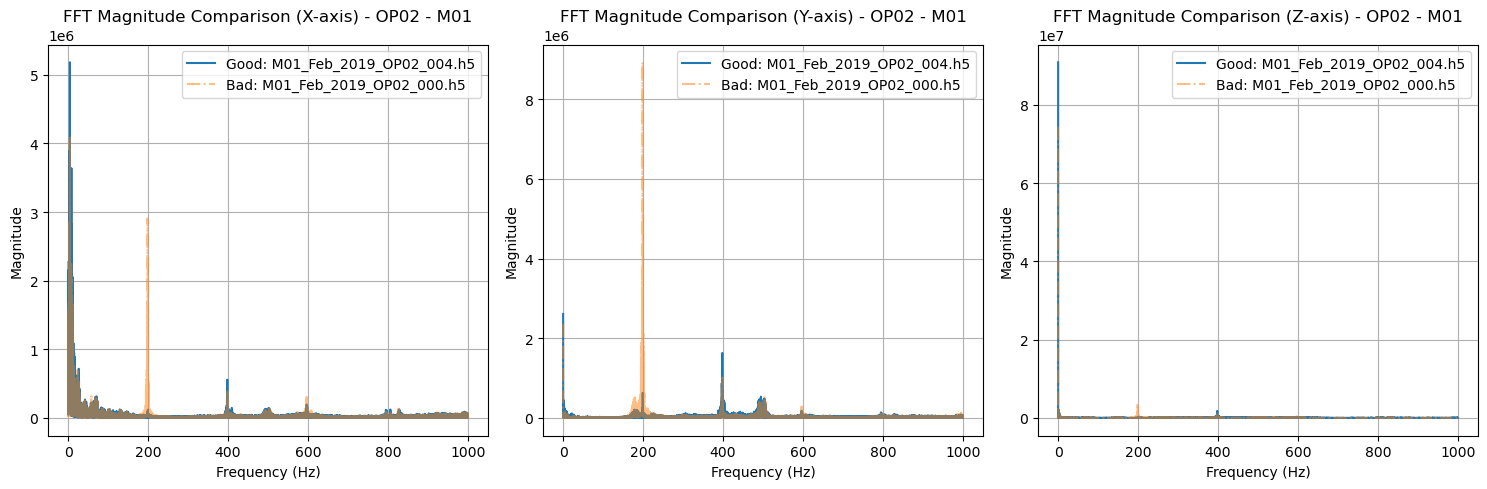

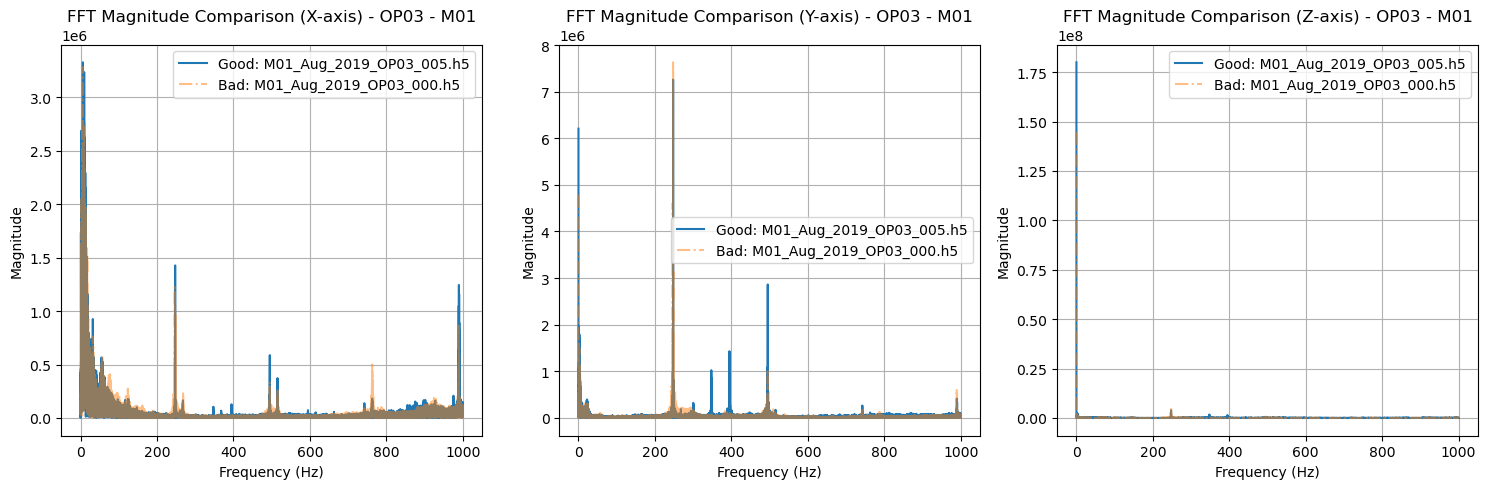

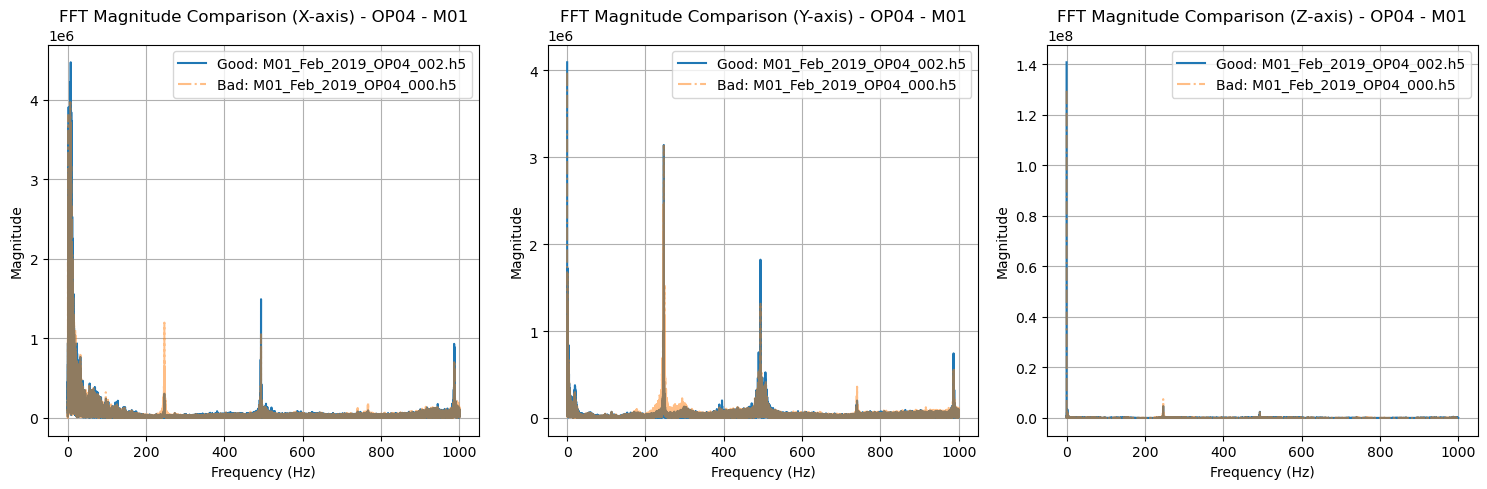

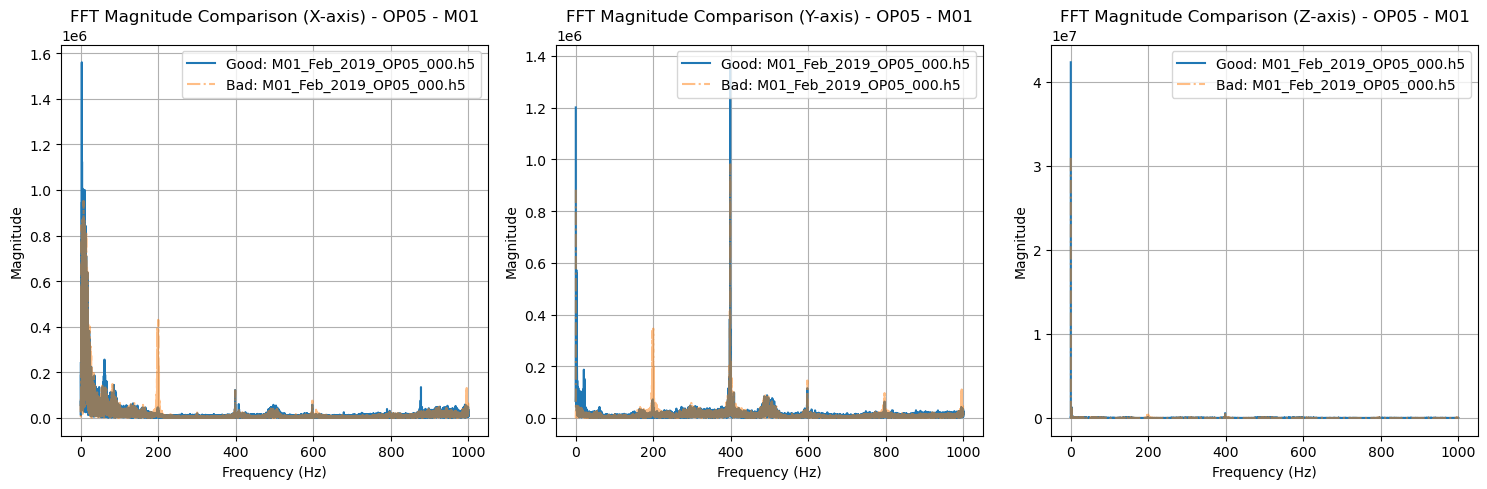

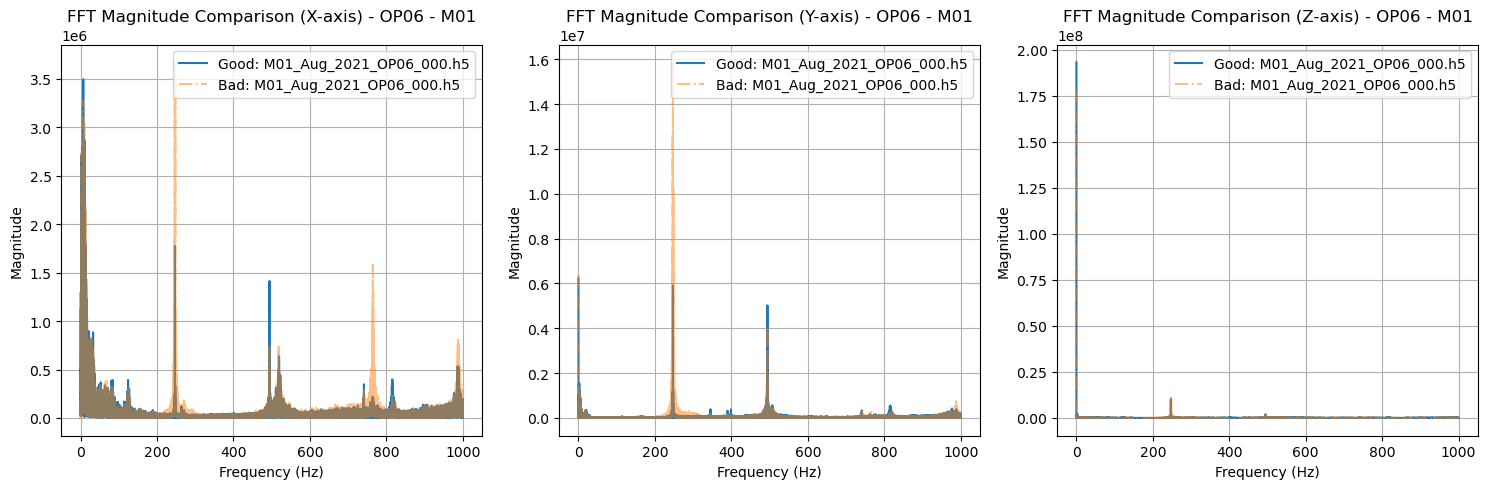

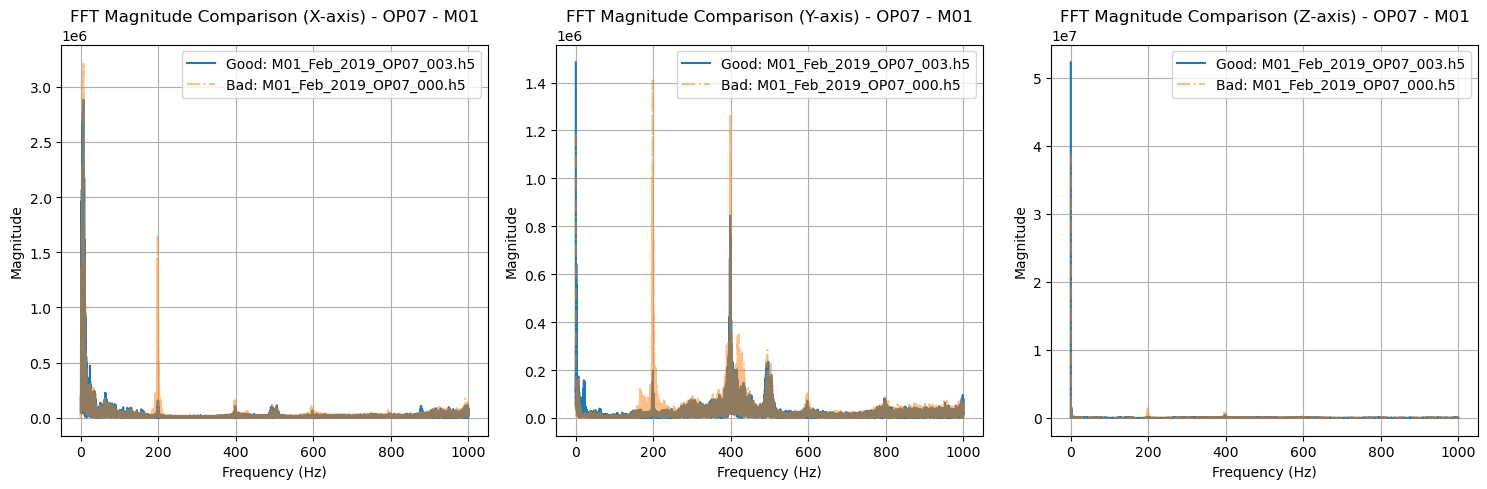

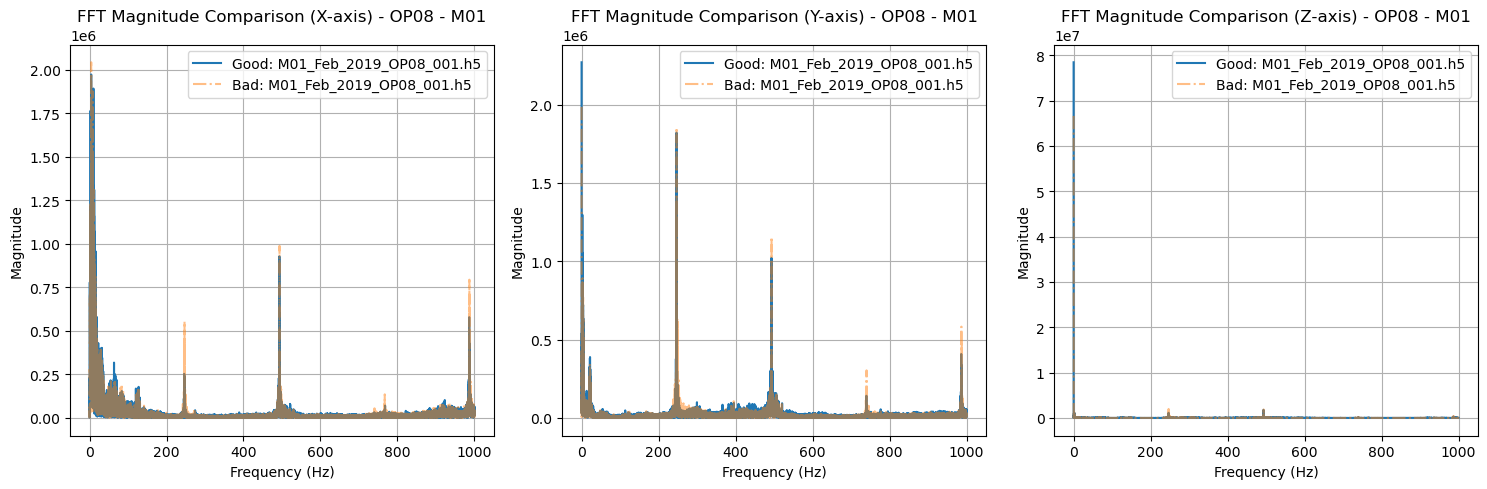

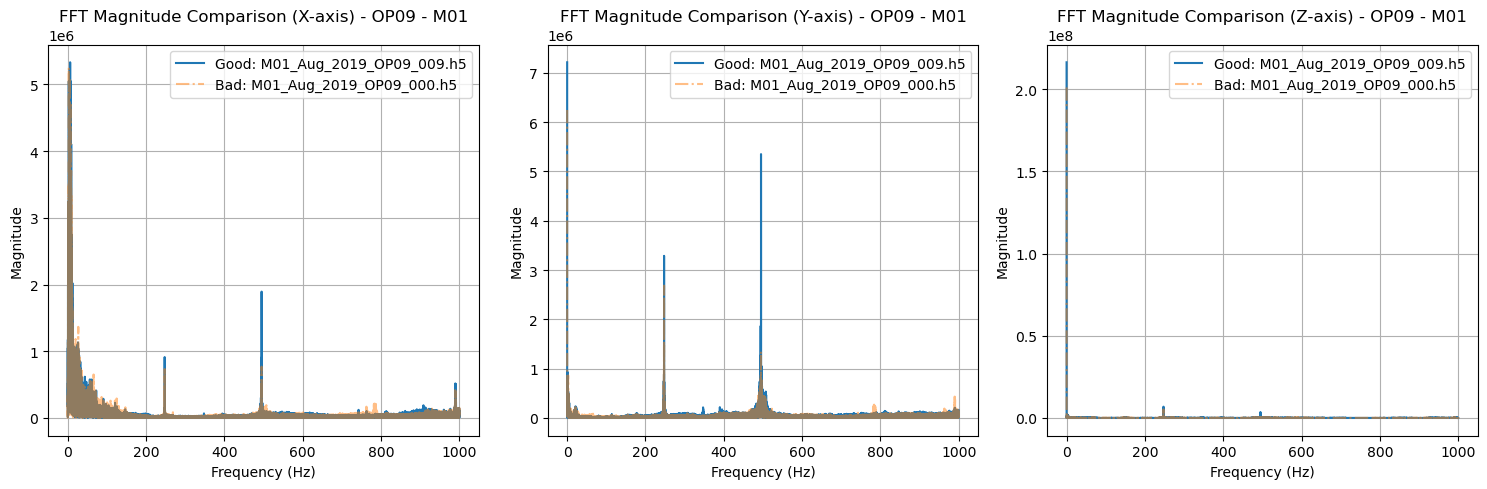

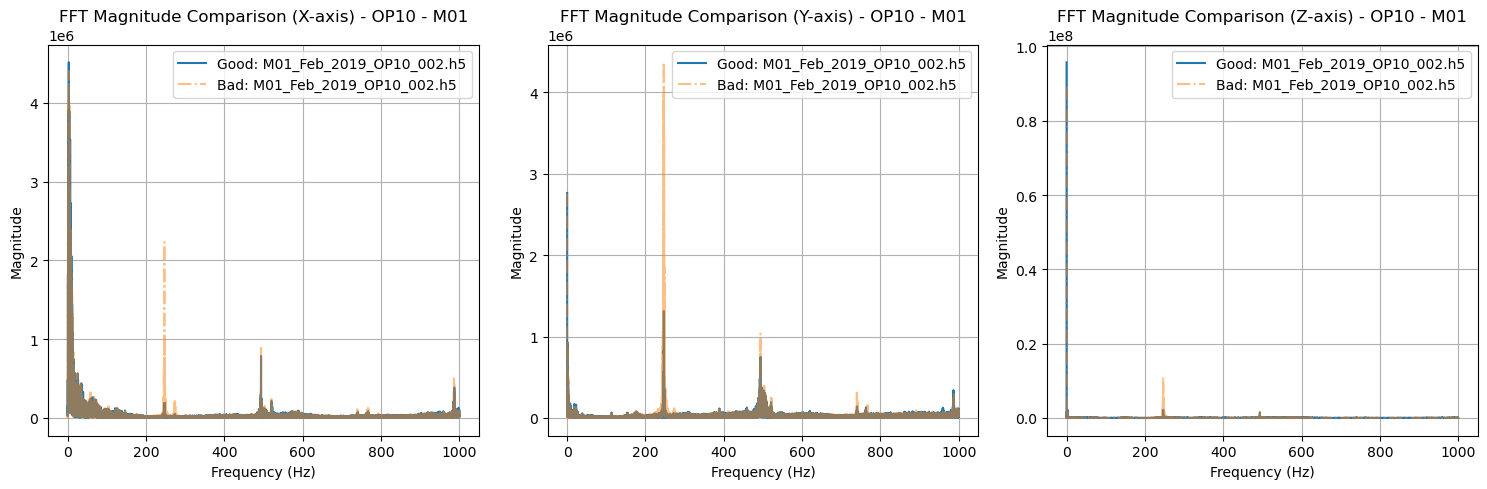

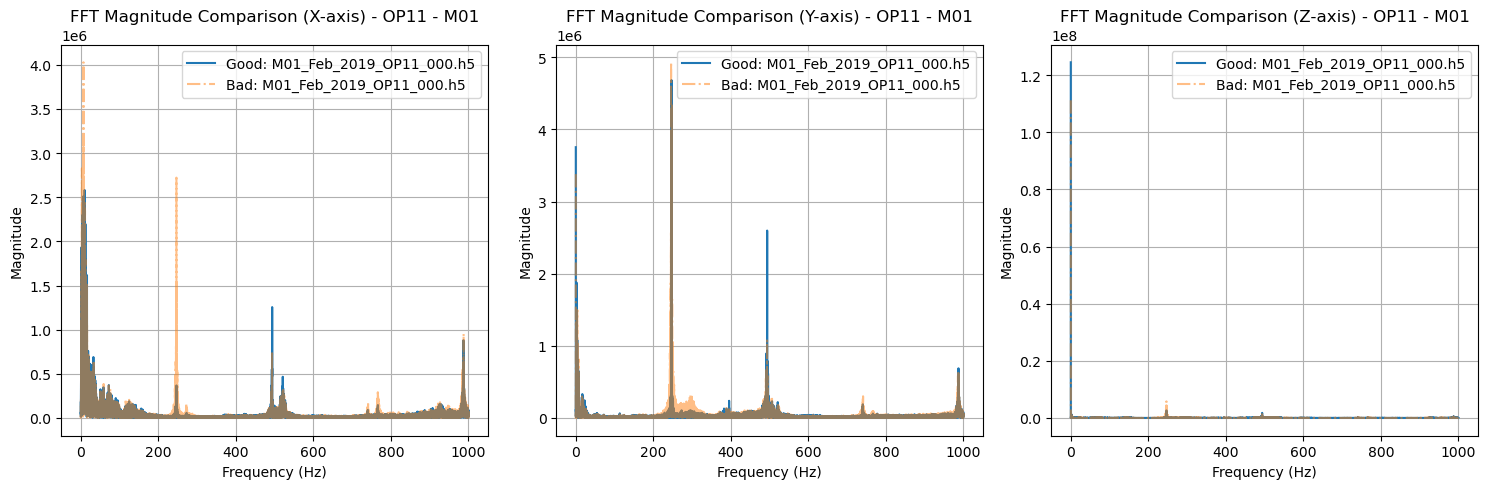

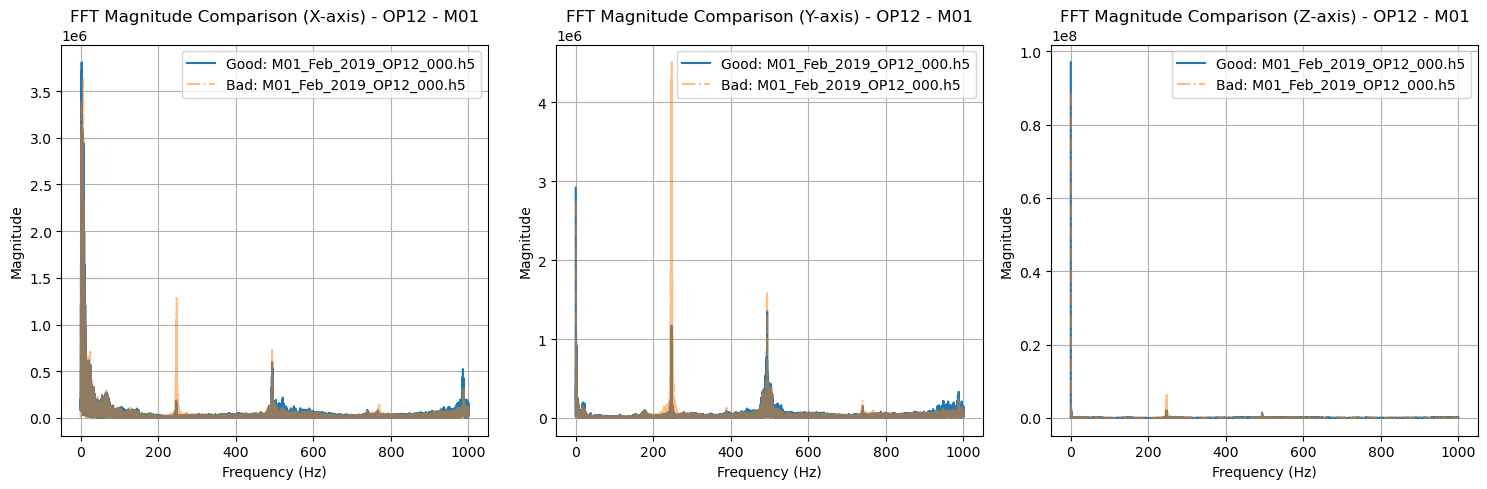

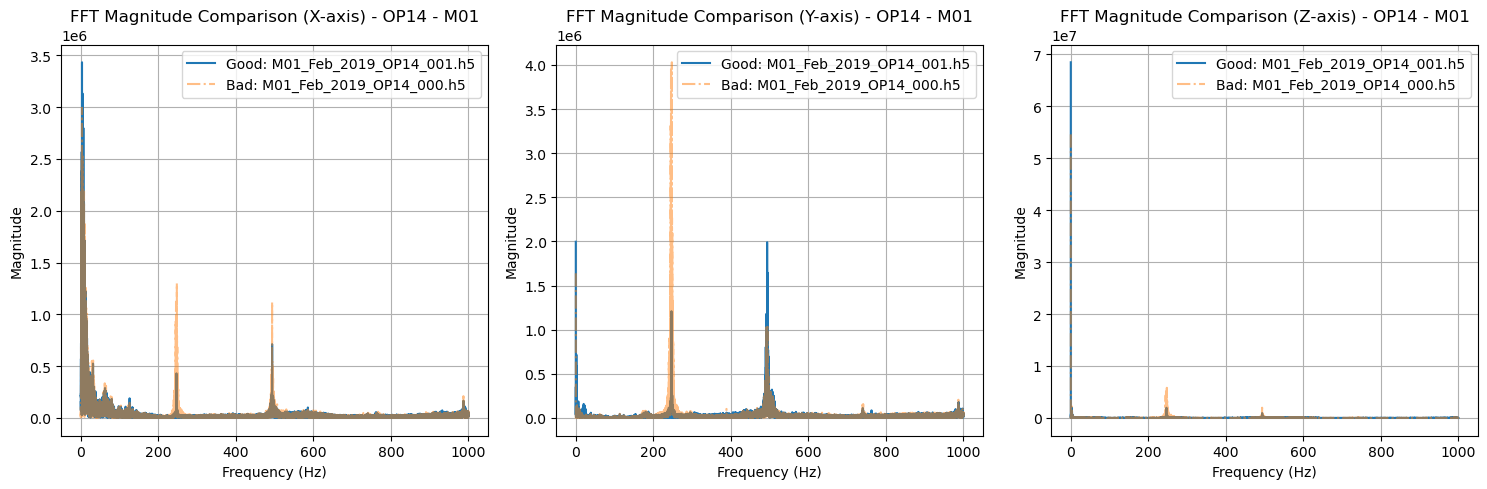

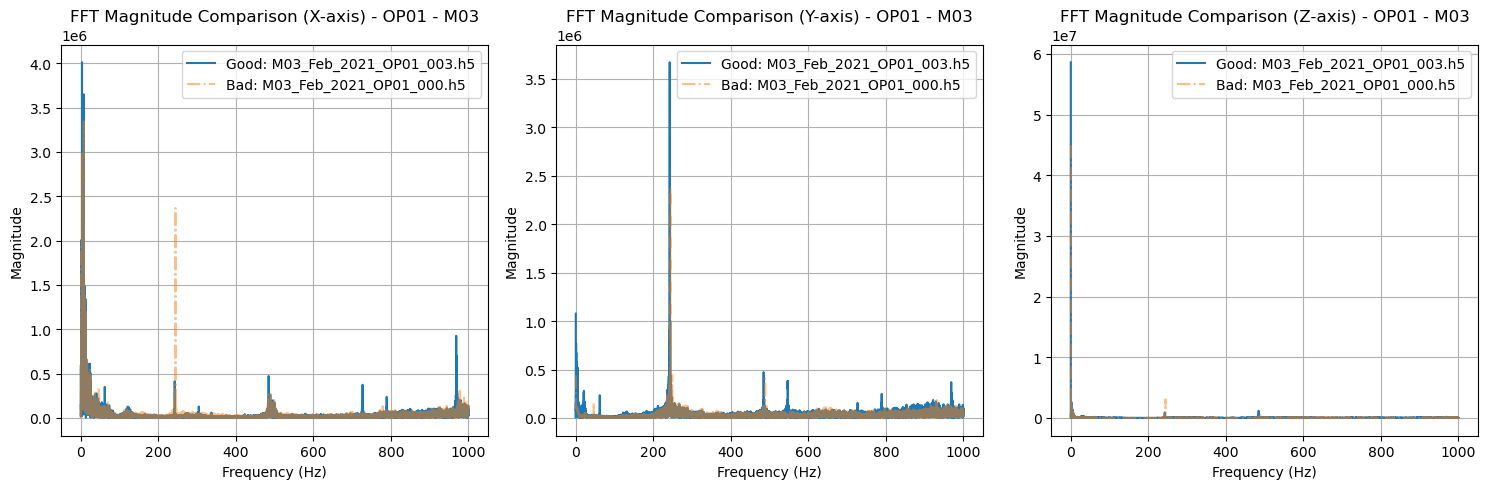

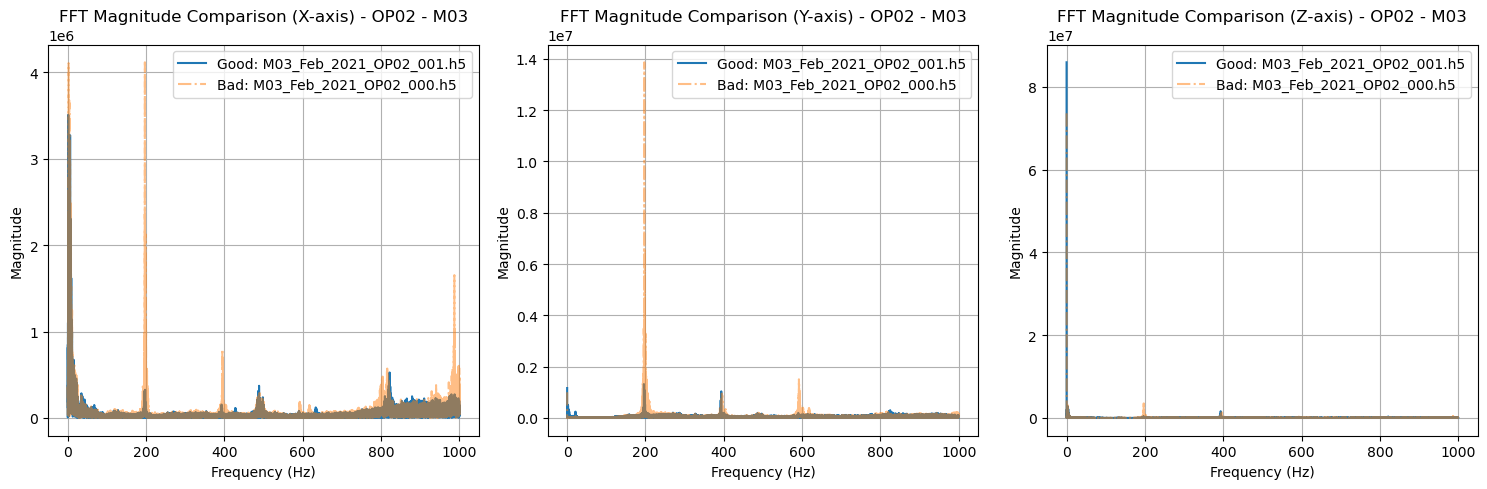

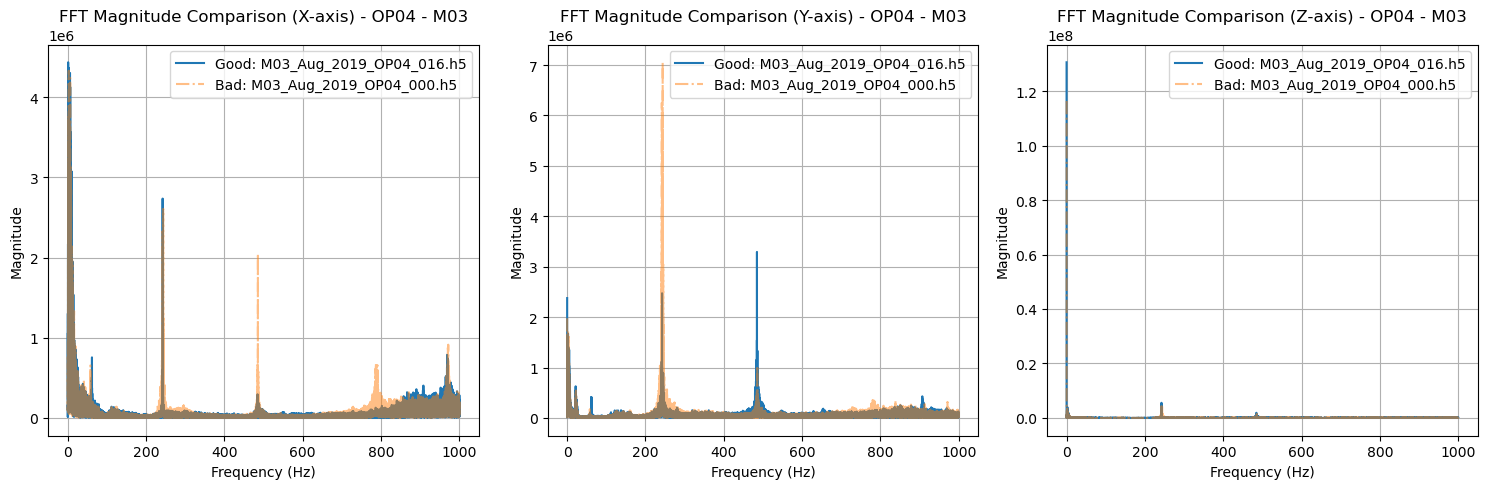

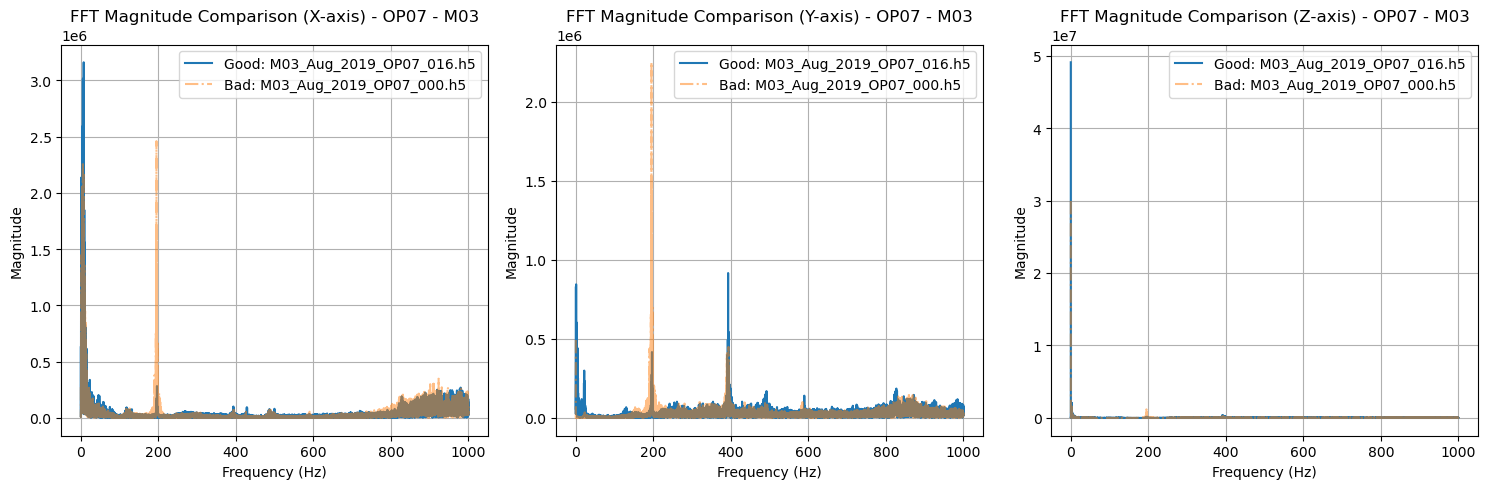

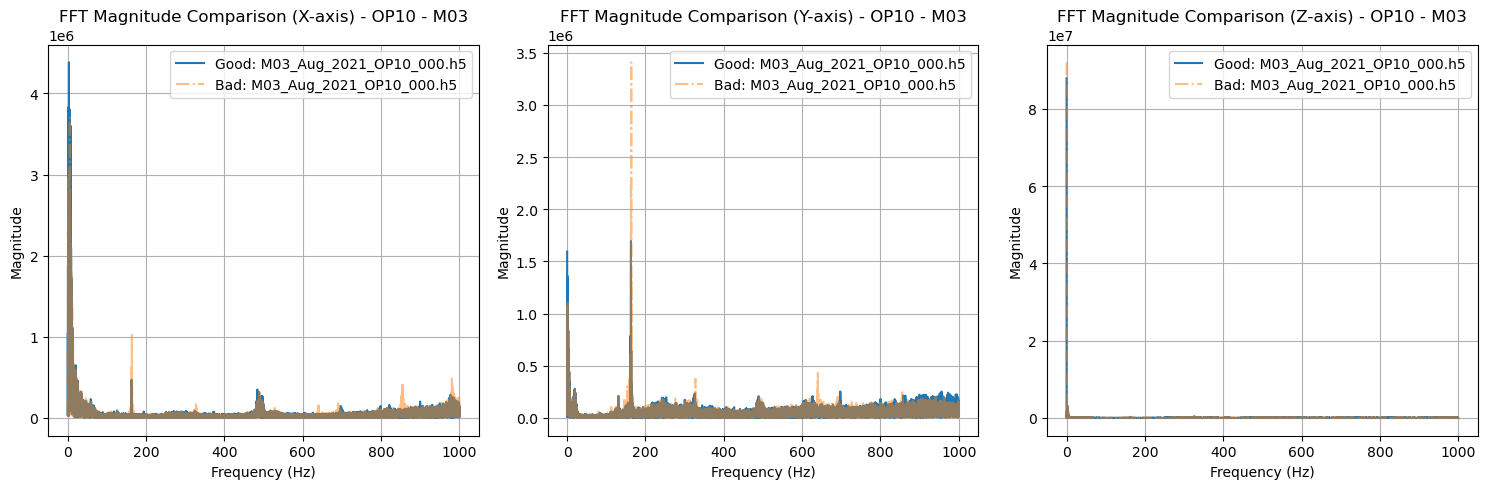

In [50]:
data_root = "./data/"
# Iterate through each machine and operation
for machine in machines:
    for operation in df_sorted[df_sorted['Machine'] == machine]['Operation']:
        bad_folder = os.path.join(data_root, machine, operation, 'bad')
        # Check if there are bad samples for the current operation
        if os.path.exists(bad_folder):
            # Get the list of bad files
            bad_files = [file for file in os.listdir(bad_folder) if file.endswith('.h5')]
            # Check if there are bad files for the current operation
            if bad_files:
                # Iterate through each bad sample
                for bad_file in bad_files:
                    # Extract the year and month from the bad file name
                    bad_year_month = bad_file.split('_')[1] + '_' + bad_file.split('_')[2]
                    # Find corresponding good samples based on the year and month
                    corresponding_good_files = [file for file in os.listdir(os.path.join(data_root, machine, operation, 'good')) if file.endswith('.h5') and bad_year_month in file]
                    if corresponding_good_files:
                        # Load vibration data for bad sample
                        with h5py.File(os.path.join(bad_folder, bad_file), 'r') as bad_h5:
                            bad_data_x = bad_h5['vibration_data'][:, 0]
                            bad_data_y = bad_h5['vibration_data'][:, 1]
                            bad_data_z = bad_h5['vibration_data'][:, 2]
                        # Compute FFT for bad sample (X-axis)
                        freqs_bad_x, magnitudes_bad_x = compute_fft(bad_data_x, sampling_freq)
                        freqs_bad_y, magnitudes_bad_y = compute_fft(bad_data_y, sampling_freq)
                        freqs_bad_z, magnitudes_bad_z = compute_fft(bad_data_z, sampling_freq)
                        # Load and compute FFT for corresponding good sample
                        with h5py.File(os.path.join(data_root, machine, operation, 'good', corresponding_good_files[0]), 'r') as good_h5:
                            good_data_x = good_h5['vibration_data'][:, 0]
                            good_data_y = good_h5['vibration_data'][:, 1]
                            good_data_z = good_h5['vibration_data'][:, 2]
                        # Compute FFT for good sample (X-axis)
                        freqs_good_x, magnitudes_good_x = compute_fft(good_data_x, sampling_freq)
                        freqs_good_y, magnitudes_good_y = compute_fft(good_data_y, sampling_freq)
                        freqs_good_z, magnitudes_good_z = compute_fft(good_data_z, sampling_freq)
                        # Get the names of the good and bad sample files
                        good_sample_name = corresponding_good_files[0]
                        bad_sample_name = bad_file
                        # Plot FFT magnitudes for comparison
                        plt.figure(figsize=(15, 5))
                        plt.subplot(1, 3, 1)
                        plt.plot(freqs_good_x, magnitudes_good_x, label=f'Good: {good_sample_name}')
                        plt.plot(freqs_bad_x, magnitudes_bad_x, label=f'Bad: {bad_sample_name}', linestyle='dashdot', alpha=0.5)
                        plt.xlabel('Frequency (Hz)')
                        plt.ylabel('Magnitude')
                        plt.title(f'FFT Magnitude Comparison (X-axis) - {operation} - {machine}')
                        plt.legend()
                        plt.grid(True)
                        plt.subplot(1, 3, 2)
                        plt.plot(freqs_good_y, magnitudes_good_y, label=f'Good: {good_sample_name}')
                        plt.plot(freqs_bad_y, magnitudes_bad_y, label=f'Bad: {bad_sample_name}', linestyle='dashdot', alpha=0.5)
                        plt.xlabel('Frequency (Hz)')
                        plt.ylabel('Magnitude')
                        plt.title(f'FFT Magnitude Comparison (Y-axis) - {operation} - {machine}')
                        plt.legend()
                        plt.grid(True)
                        plt.subplot(1, 3, 3)
                        plt.plot(freqs_good_z, magnitudes_good_z, label=f'Good: {good_sample_name}')
                        plt.plot(freqs_bad_z, magnitudes_bad_z, label=f'Bad: {bad_sample_name}', linestyle='dashdot', alpha=0.5)
                        plt.xlabel('Frequency (Hz)')
                        plt.ylabel('Magnitude')
                        plt.title(f'FFT Magnitude Comparison (Z-axis) - {operation} - {machine}')
                        plt.legend()
                        plt.grid(True)
                        plt.tight_layout()
                        plt.show()
                        # Break out of the loop after plotting one set of plots for each operation and machine pair
                        break


In [24]:
def load_data(file_path):
    """Load vibration data from an HDF5 file."""
    with h5py.File(file_path, 'r') as file:
        df = file['vibration_data'][:]
    return pd.DataFrame({'X': df[:, 0], 'Y': df[:, 1], 'Z': df[:, 2]})

In [22]:
def extract_custom_features_from_file(file_path):
    """Extract custom features from a single HDF5 file."""
    with h5py.File(file_path, 'r') as file:
        # Extract the vibration data
        vibration_data = file['vibration_data'][:]
    
    # Convert vibration data to DataFrame
    vibration_df = pd.DataFrame({'X': vibration_data[:, 0], 'Y': vibration_data[:, 1], 'Z': vibration_data[:, 2]})
    
    # Add a time index (since we don't have one, we'll just use row numbers)
    vibration_df['time'] = range(len(vibration_df))
    
    # Perform imputation to handle missing values
    imputed_df = impute(vibration_df)
    
    # Extract custom features using tsfresh
    custom_features = extract_features(imputed_df, column_id='time', default_fc_parameters=MinimalFCParameters())
    
    return custom_features

# Example usage:
data_file = './data/M01/OP01/good/M01_Feb_2019_OP01_000.h5'  # Replace with the actual file path

# Extract custom features from the file
custom_features = extract_custom_features_from_file(data_file)
print(custom_features)

Feature Extraction: 100%|███████████████████████| 20/20 [03:13<00:00,  9.68s/it]


       X__sum_values  X__median  X__mean  X__length  X__standard_deviation  \
0                9.0        9.0      9.0        1.0                    0.0   
1                9.0        9.0      9.0        1.0                    0.0   
2                5.0        5.0      5.0        1.0                    0.0   
3                5.0        5.0      5.0        1.0                    0.0   
4               11.0       11.0     11.0        1.0                    0.0   
...              ...        ...      ...        ...                    ...   
58795           23.0       23.0     23.0        1.0                    0.0   
58796           11.0       11.0     11.0        1.0                    0.0   
58797           19.0       19.0     19.0        1.0                    0.0   
58798           31.0       31.0     31.0        1.0                    0.0   
58799           17.0       17.0     17.0        1.0                    0.0   

       X__variance  X__root_mean_square  X__maximum  X__absolut

In [86]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import random
import shutil
import tempfile


In [91]:
# Define a function to balance the dataset
def balance_dataset(machines, selected_operations, data_root):
    balanced_data = []
    # Directory 
    directory = "balanced_data_root"
   
    # Parent Directory path 
    parent_dir = data_root
   
    # Path 
    path = os.path.join(parent_dir, directory) 
   
    # Create the directory 
    os.mkdir(path) 
    print("Directory '%s' created" %directory) 

    directory_bad = "bad_data_root"
    directory_good = "good_data_root"
   
    # Parent Directory path 
    parent_dir = directory
   
    # Path 
    path_bad = os.path.join(path, directory_bad)
    path_good = os.path.join(path, directory_good) 

   
    # Create the directory 
    #if not os.path.exists(path_bad):
    os.makedirs(path_bad, exist_ok=True)
    print("Directory '%s' created" %directory_bad) 

    #if not os.path.exists(path_good):
    os.makedirs(path_good, exist_ok=True)
    print("Directory '%s' created" %directory_good) 

    


    for machine in machines:
        for operation in selected_operations:
            bad_folder = os.path.join(data_root, machine, operation, 'bad')
            good_folder = os.path.join(data_root, machine, operation, 'good')
            
            # Check if there are bad samples for the current operation
            if os.path.exists(bad_folder):
                # Get the list of bad files
                bad_files = [file for file in os.listdir(bad_folder) if file.endswith('.h5')]
                # Check if there are bad files for the current operation
                if bad_files:
                    # Get the number of bad samples for this operation
                    num_bad_samples = len(bad_files)

                    for file in bad_files:
                        source_bad = os.path.join(data_root, machine, operation, 'bad', file)
                        shutil.copy(source_bad, directory_bad)
                        print(f"Copied '{file}' from '{source_bad}' to '{directory_bad}' successfully.")

                        source_file_size = os.path.getsize(source_bad)
                        print(f"Copying '{file}' (size: {source_file_size} bytes).")
                        
                        balanced_data.append((machine, operation, 'bad', file))


                        #shutil.copy(os.path.join(data_root, machine, operation, 'bad', file), directory_bad)
                    
                    # Get the list of good files
                    good_files = [file for file in os.listdir(good_folder) if file.endswith('.h5')]
                    # Randomly select the same number of good samples as bad samples
                    random_good_files = random.sample(good_files, num_bad_samples)
                    
                    


                    
                    for file in random_good_files:
                        source_good = os.path.join(data_root, machine, operation, 'good', file)
                        shutil.copy(source_good, directory_good)
                                            
                        balanced_data.append((machine, operation, 'good', file))                        
                        print(f"Copied '{file}' from '{source_good}' to '{directory_good}' successfully.")

                        source_file_size_g = os.path.getsize(source_good)
                        print(f"Copying '{file}' (size: {source_file_size_g} bytes).")
                        
                        
    return balanced_data

In [92]:
# Step 1: Data Preparation
selected_operations = ['OP00', 'OP01', 'OP02', 'OP03', 'OP04', 'OP05', 'OP06', 'OP07','OP08', 'OP09', 'OP10', 'OP11', 'OP12', 'OP13', 'OP14']
machines = ['M01', 'M02', 'M03']
data_root = "./data/"

balanced_data = balance_dataset(machines, selected_operations, data_root)

Directory 'balanced_data_root' created
Directory 'bad_data_root' created
Directory 'good_data_root' created
Copied 'M01_Feb_2019_OP01_000.h5' from './data/M01/OP01/bad/M01_Feb_2019_OP01_000.h5' to 'bad_data_root' successfully.
Copying 'M01_Feb_2019_OP01_000.h5' (size: 252057 bytes).
Copied 'M01_Aug_2019_OP01_000.h5' from './data/M01/OP01/bad/M01_Aug_2019_OP01_000.h5' to 'bad_data_root' successfully.
Copying 'M01_Aug_2019_OP01_000.h5' (size: 215848 bytes).
Copied 'M01_Feb_2021_OP01_003.h5' from './data/M01/OP01/good/M01_Feb_2021_OP01_003.h5' to 'good_data_root' successfully.
Copying 'M01_Feb_2021_OP01_003.h5' (size: 313426 bytes).
Copied 'M01_Feb_2021_OP01_004.h5' from './data/M01/OP01/good/M01_Feb_2021_OP01_004.h5' to 'good_data_root' successfully.
Copying 'M01_Feb_2021_OP01_004.h5' (size: 311295 bytes).
Copied 'M01_Feb_2019_OP02_000.h5' from './data/M01/OP02/bad/M01_Feb_2019_OP02_000.h5' to 'bad_data_root' successfully.
Copying 'M01_Feb_2019_OP02_000.h5' (size: 390277 bytes).
Copied '

In [82]:
balanced_data

[('M01', 'OP01', 'bad', 'M01_Feb_2019_OP01_000.h5'),
 ('M01', 'OP01', 'bad', 'M01_Aug_2019_OP01_000.h5'),
 ('M01', 'OP01', 'good', 'M01_Feb_2020_OP01_001.h5'),
 ('M01', 'OP01', 'good', 'M01_Aug_2019_OP01_005.h5'),
 ('M01', 'OP02', 'bad', 'M01_Feb_2019_OP02_000.h5'),
 ('M01', 'OP02', 'good', 'M01_Aug_2019_OP02_014.h5'),
 ('M01', 'OP03', 'bad', 'M01_Aug_2019_OP03_000.h5'),
 ('M01', 'OP03', 'good', 'M01_Feb_2021_OP03_007.h5'),
 ('M01', 'OP04', 'bad', 'M01_Feb_2019_OP04_000.h5'),
 ('M01', 'OP04', 'bad', 'M01_Aug_2019_OP04_000.h5'),
 ('M01', 'OP04', 'good', 'M01_Feb_2019_OP04_000.h5'),
 ('M01', 'OP04', 'good', 'M01_Aug_2019_OP04_010.h5'),
 ('M01', 'OP05', 'bad', 'M01_Feb_2019_OP05_000.h5'),
 ('M01', 'OP05', 'bad', 'M01_Feb_2021_OP05_000.h5'),
 ('M01', 'OP05', 'bad', 'M01_Feb_2019_OP05_001.h5'),
 ('M01', 'OP05', 'bad', 'M01_Aug_2019_OP05_000.h5'),
 ('M01', 'OP05', 'good', 'M01_Aug_2019_OP05_007.h5'),
 ('M01', 'OP05', 'good', 'M01_Feb_2020_OP05_001.h5'),
 ('M01', 'OP05', 'good', 'M01_Feb_2020

In [46]:


# Function to load vibration data from a single file
def load_vibration_data(file_path):
    with h5py.File(file_path, 'r') as file:
        # Extract the vibration data
        vibration_data = file['vibration_data'][:]
    # Convert vibration data to DataFrame
    vibration_df = pd.DataFrame({'X': vibration_data[:, 0], 'Y': vibration_data[:, 1], 'Z': vibration_data[:, 2]})
    return vibration_df

def load_dataset(balanced_data, data_root, max_sequence_length):
    X = []  # Features (vibration data)
    y = []  # Labels (good or bad)
    
    for machine, operation, label, file_name in balanced_data:
        file_path = os.path.join(data_root, machine, operation, label, file_name)
        vibration_df = load_vibration_data(file_path)
        # Pad or truncate the sequences to a fixed length
        if len(vibration_df) < max_sequence_length:
            # Pad sequence with zeros
            padded_sequence = np.pad(vibration_df.values, ((0, max_sequence_length - len(vibration_df)), (0, 0)), mode='constant')
        else:
            # Truncate sequence
            padded_sequence = vibration_df.values[:max_sequence_length, :]
        # Flatten the padded sequence into a 1D vector
        flattened_sequence = padded_sequence.flatten()
        X.append(flattened_sequence)
        y.append(label)
    
    return np.array(X), np.array(y)

# Step 1: Data Preparation
selected_operations = ['OP01', 'OP02', 'OP04', 'OP07', 'OP10']
machines = ['M01', 'M02', 'M03']
data_root = "./data/"
max_sequence_length = 1000  # Define the maximum sequence length

balanced_data = balance_dataset(machines, selected_operations, data_root)

# Step 2: Load and Prepare the Dataset with Padding/Truncation
X, y = load_dataset(balanced_data, data_root, max_sequence_length)

# Step 3: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Model Training
max_features = None  # You can set it to a specific value if desired
n_estimators = 100  # Number of trees in the forest
max_depth = None  # Maximum depth of the tree
min_samples_leaf = 1  # Minimum number of samples required to be at a leaf node
min_samples_split = 2  # Minimum number of samples required to split an internal node

model = RandomForestClassifier(
    max_features=max_features,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    min_samples_split=min_samples_split,
    random_state=37
)
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 6: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='bad')  # or 'good' depending on your class labels
recall = recall_score(y_test, y_pred, pos_label='bad')  # or 'good' depending on your class labels
f1 = f1_score(y_test, y_pred, pos_label='bad')  # or 'good' depending on your class labels
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9047619047619048
Precision: 1.0
Recall: 0.8181818181818182
F1 Score: 0.9
Confusion Matrix:
[[ 9  2]
 [ 0 10]]


In [62]:
import numpy as np
from scipy.fft import fft
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

def compute_fft_features(vibration_data, sampling_freq, freq_bins):
    # Compute FFT
    fft_result = np.fft.fft(vibration_data)
    freqs = np.fft.fftfreq(len(vibration_data), 1 / sampling_freq)
    
    # Initialize lists to store feature values
    fft_features = []
    
    # Compute features for each frequency bin
    for freq_range in freq_bins:
        start_freq, end_freq = freq_range
        mask = (freqs >= start_freq) & (freqs < end_freq)
        freq_subset = freqs[mask]
        magnitude_subset = np.abs(fft_result[mask])
        
        # Check if the subset is empty
        if len(freq_subset) == 0:
            # Skip this frequency bin
            continue
        
        # Compute features for this frequency bin
        mean_magnitude = np.mean(magnitude_subset)
        max_magnitude = np.max(magnitude_subset)
        min_magnitude = np.min(magnitude_subset)
        std_magnitude = np.std(magnitude_subset)
        
        fft_features.extend([mean_magnitude, max_magnitude, min_magnitude, std_magnitude])
    
    return fft_features




def normalize_features(features):
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(features)
    return normalized_features

def select_features(X, y, k):
    selector = SelectKBest(score_func=f_classif, k=k)
    selected_features = selector.fit_transform(X, y)
    return selected_features

# Example usage:
vibration_data = load_vibration_data('./data/M01/OP01/good/M01_Feb_2019_OP01_000.h5')  # Example vibration data
sampling_freq = 2000  # Example sampling frequency
freq_bins_x = [(0, 10000), (10000, 50000), (50000, 100000), (100000, 500000),(500000,1000000), (1000000, 5000000)]
freq_bins_y = [(0, 10000), (10000, 50000), (50000, 100000), (100000, 500000),(500000,1000000), (1000000, 5000000)]
freq_bins_z = [(0, 50000), (50000, 100000), (100000, 500000), (500000, 1000000),(1000000,5000000), (5000000, 10000000), (10000000,100000000)]

# Compute FFT features for each axis separately
fft_features_x = compute_fft_features(vibration_data['X'].values, sampling_freq, freq_bins_x)
fft_features_y = compute_fft_features(vibration_data['Y'].values, sampling_freq, freq_bins_y)
fft_features_z = compute_fft_features(vibration_data['Z'].values, sampling_freq, freq_bins_z)

# Stack the features vertically
all_fft_features = np.vstack([fft_features_x, fft_features_y, fft_features_z])


In [63]:
all_fft_features

array([[3.08094564e+04, 3.51696028e+06, 1.10737259e+02, 9.80850496e+04],
       [1.86621078e+04, 2.01639964e+06, 4.71908793e+01, 3.03670018e+04],
       [1.65854340e+04, 6.10108130e+07, 5.04511987e+01, 3.57683767e+05]])

In [33]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy.stats import skew

# Function to compute FFT and extract features for each axis
def compute_fft_features(file_path, max_length=100):
    with h5py.File(file_path, 'r') as file:
        vibration_data = file['vibration_data'][:]
    features = []
    for axis_data in vibration_data.T:  # Transpose to iterate over each axis
        fft_result = np.fft.fft(axis_data)
        magnitudes = np.abs(fft_result)
        centroid = np.sum(np.arange(len(magnitudes)) * magnitudes) / np.sum(magnitudes)
        spread = np.sqrt(np.sum(((np.arange(len(magnitudes)) - centroid) ** 2) * magnitudes) / np.sum(magnitudes))
        skewness = skew(magnitudes)
        axis_features = np.concatenate([magnitudes, [centroid, spread, skewness]])
        # Truncate or pad the features to a fixed length
        if len(axis_features) < max_length:
            axis_features = np.pad(axis_features, (0, max_length - len(axis_features)))
        else:
            axis_features = axis_features[:max_length]
        features.append(axis_features)
    return np.concatenate(features)

# Load the dataset
balanced_data = balanced_data  # Your list of balanced samples]

# Extract features and labels
X = []
y = []
for machine, operation, label, file_name in balanced_data:
    file_path = os.path.join(data_root, machine, operation, label, file_name)
    fft_features = compute_fft_features(file_path)
    X.append(fft_features)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RF classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

# Initialize and train MLP classifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
print("Multi-Layer Perceptron Classifier:")
print(classification_report(y_test, mlp_predictions))

# Initialize and train SVC classifier
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
svc_predictions = svc_classifier.predict(X_test)
print("Support Vector Classifier:")
print(classification_report(y_test, svc_predictions))




Random Forest Classifier:
              precision    recall  f1-score   support

         bad       1.00      1.00      1.00         7
        good       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Multi-Layer Perceptron Classifier:
              precision    recall  f1-score   support

         bad       0.70      1.00      0.82         7
        good       1.00      0.57      0.73         7

    accuracy                           0.79        14
   macro avg       0.85      0.79      0.78        14
weighted avg       0.85      0.79      0.78        14

Support Vector Classifier:
              precision    recall  f1-score   support

         bad       0.43      0.43      0.43         7
        good       0.43      0.43      0.43         7

    accuracy                           0.43        14
   macro avg       0.43      0.43      0

In [40]:
from sklearn.preprocessing import LabelEncoder

# Reshape the input data to have a shape suitable for CNNs
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [41]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test_encoded))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_encoded)
print('Test accuracy:', test_acc)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 396ms/step - accuracy: 0.7902 - loss: 172122.5625 - val_accuracy: 0.7857 - val_loss: 53833.8789
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7812 - loss: 62573.4570 - val_accuracy: 0.5000 - val_loss: 279403.8750
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6086 - loss: 150875.1406 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8958 - loss: 17228.2266 - val_accuracy: 0.7143 - val_loss: 88802.0391
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7426 - loss: 94165.7344 - val_accuracy: 0.8571 - val_loss: 9214.1582
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9554 - loss: 13763.7168 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7857 - val_loss: 45076.9570
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.885

In [67]:
import os
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

def load_vibration_data(file_path):
    """Load raw vibration data from an HDF5 file."""
    with h5py.File(file_path, 'r') as file:
        vibration_data = file['vibration_data'][:]
    return vibration_data

def load_balanced_data(balanced_data, data_root):
    """Load balanced raw vibration data and labels."""
    X = []
    y = []
    for machine, operation, label, file_name in balanced_data:
        file_path = os.path.join(data_root, machine, operation, label, file_name)
        vibration_data = load_vibration_data(file_path)
        X.append(vibration_data)
        y.append(label)
    return np.array(X), np.array(y)


In [78]:
X_raw = []
y_raw = []
max_length = 50000  # Choose a maximum length for your samples

for machine, operation, label, file_name in balanced_data:
    file_path = os.path.join(data_root, machine, operation, label, file_name)
    
    with h5py.File(file_path, 'r') as file:
        # Extract the vibration data
        vibration_data = file['vibration_data'][:]
        # Extract X, Y, Z columns
        X = vibration_data[:, 0]
        Y = vibration_data[:, 1]
        Z = vibration_data[:, 2]
        # Concatenate X, Y, Z into a single array
        combined_data = np.column_stack((X, Y, Z))
        
        # Pad or truncate the sample to the maximum length
        if len(combined_data) < max_length:
            # Pad the sample with zeros to the maximum length
            padded_data = np.pad(combined_data, ((0, max_length - len(combined_data)), (0, 0)), mode='constant')
        else:
            # Truncate the sample to the maximum length
            padded_data = combined_data[:max_length, :]
    
        X_raw.append(padded_data)
        y_raw.append(label)

X_raw = np.array(X_raw)
y_raw = np.array(y_raw)



In [79]:
# Load balanced data

# Split the data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)


In [82]:
print("X_raw shape:", X_raw.shape)
print("y_raw shape:", y_raw.shape)


X_raw shape: (70, 50000, 3)
y_raw shape: (70,)


In [80]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    """Train and evaluate the model."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def train_and_evaluate_cnn(X_train, y_train, X_test, y_test):
    """Train and evaluate the CNN model."""
    model = models.Sequential([
        layers.Conv1D(32, 3, activation='relu', input_shape=X_train.shape[1:]),
        layers.MaxPooling1D(2),
        layers.Conv1D(64, 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    _, accuracy = model.evaluate(X_test, y_test)
    return accuracy


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# Flatten the input data for RandomForestClassifier
X_train_flat = X_train_raw.reshape(len(X_train_raw), -1)
X_test_flat = X_test_raw.reshape(len(X_test_raw), -1)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the Random Forest classifier
rf_model.fit(X_train_flat, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_flat)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)
from sklearn.svm import SVC

# Initialize the SVC classifier
svc_model = SVC()

# Train the SVC classifier
svc_model.fit(X_train_flat, y_train)

# Make predictions on the testing set
y_pred_svc = svc_model.predict(X_test_flat)

# Calculate the accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier Accuracy:", accuracy_svc)
from sklearn.neural_network import MLPClassifier

# Initialize the MLP classifier
mlp_model = MLPClassifier()

# Train the MLP classifier
mlp_model.fit(X_train_flat, y_train)

# Make predictions on the testing set
y_pred_mlp = mlp_model.predict(X_test_flat)

# Calculate the accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Multi-Layer Perceptron Accuracy:", accuracy_mlp)
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Convert input data to float32
X_train_cnn = np.array(X_train_raw).astype('float32')
X_test_cnn = np.array(X_test_raw).astype('float32')

# Normalize input data (optional but recommended for neural networks)
X_train_cnn /= 255.0
X_test_cnn /= 255.0

# Define the CNN model architecture
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(50000, 3)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_raw, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the CNN model
test_loss, test_acc = cnn_model.evaluate(X_test_raw, y_test)
print("CNN Test Accuracy:", test_acc)



Random Forest Classifier Accuracy: 0.9285714285714286
Support Vector Classifier Accuracy: 0.6428571428571429
Multi-Layer Perceptron Accuracy: 0.5


/home/fe/asadi/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-08 03:31:01.760137: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159993600 exceeds 10% of free system memory.
2024-05-08 03:31:01.815369: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159993600 exceeds 10% of free system memory.


ValueError: Invalid dtype: str128

In [102]:
import numpy as np
from scipy.fft import rfft, rfftfreq

def extract_raw_features(df):
    """Calculates features directly from the raw vibration data (X, Y, Z)"""
    features = {
        'x_mean': df['X'].mean(),
        'y_mean': df['Y'].mean(),
        'z_mean': df['Z'].mean(),
        'x_std': df['X'].std(),
        # ... more features like variance, skewness, kurtosis, etc.  
    }
    return features

def extract_features_from_file(data_path, sampling_freq=2000, freq_bins=[(0, 100), (100, 200)]):  
    # ... (Your code for loading data)

    raw_features = extract_raw_features(vibration_df)

    # Calculate FFT features for each axis
    for axis in ['X', 'Y', 'Z']: 
        fft_features = compute_fft_features(data_path) 
        all_features.update(dict(zip(['{}_fft_feature_{}'.format(axis, i) for i in range(len(fft_features))], fft_features))) 

    return all_features


In [105]:
feature_dict = {} 
all_features = {}
for machine, operation, label, file in balanced_data:
    data_path = os.path.join(data_root, machine, operation, label, file)
    all_features = extract_features_from_file(data_path) 
    all_features['machine'] = machine
    all_features['operation'] = operation
    all_features['label'] = label
    feature_dict[file] = all_features 



In [106]:
feature_dict

{'M01_Feb_2019_OP01_000.h5': {'X_fft_feature_0': 989351.0,
  'X_fft_feature_1': 98280.59192066941,
  'X_fft_feature_2': 106011.60404656293,
  'X_fft_feature_3': 129610.6505330205,
  'X_fft_feature_4': 124853.21601933206,
  'X_fft_feature_5': 190549.85424986103,
  'X_fft_feature_6': 103139.83670959651,
  'X_fft_feature_7': 15327.043491887616,
  'X_fft_feature_8': 150002.04009820963,
  'X_fft_feature_9': 697100.2404176922,
  'X_fft_feature_10': 126990.3036778701,
  'X_fft_feature_11': 59384.53193993377,
  'X_fft_feature_12': 57774.27511657961,
  'X_fft_feature_13': 88577.0513654608,
  'X_fft_feature_14': 436570.9101114818,
  'X_fft_feature_15': 263811.74412155844,
  'X_fft_feature_16': 378462.76812817744,
  'X_fft_feature_17': 696897.1249212902,
  'X_fft_feature_18': 1392022.2685056822,
  'X_fft_feature_19': 1342470.6219656684,
  'X_fft_feature_20': 332228.94466887694,
  'X_fft_feature_21': 364944.7586961094,
  'X_fft_feature_22': 221972.68551814425,
  'X_fft_feature_23': 309180.06756818